Proceed with the dataset and find the best classifier predicting survivability.
*   Use all the classifiers covered so far. Provide automatic mechanism to compare performance of various models.
*   If you would like to look for some other classifiers in sklearn, then it is OK.
*   Use pipelines if necessary, especially if you decide to use normalization/standardization or PCA.
*   For each model, try to find the best hyperparameters.
*   For various results of cross-validation present ROCs and PRCs.
*   If you lack data (`NaN` etc.), do not skip the samples. Instead, impute them: the best option is to find similar samples (on the basis of other features) and then calculate the missing data by taking mean value. You can apply some basic form of clustering. KNNs are also the option.

**This homework is obligatory. Just do as much time lets you. Even a small analysis will be welcome. Please send colab link to krusek@agh.edu.pl before 17.04.2024. Give permission to edit!**

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [1]:
!pip install -r ../requirements.txt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno
import re



In [2]:
import logging
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="NOTSET", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

logger = logging.getLogger("rich")


In [3]:

v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [4]:
DO_NOT_PLOT = False

In [5]:


def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    logger.info(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    logger.info(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    logger.info(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [6]:
#@markdown You know this data, but so far you had the opportunity to work with classification on it
#https://www.openml.org/search?type=data&sort=runs&id=40945&status=active
#titanic = pd.read_csv('https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/titanic.csv')
df = fetch_openml("titanic", version=1, as_frame=True)
df = df['frame']
display(df)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## Convert some data, cleanup

[13:47:28] DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=623849;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=199689;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py#414\414]8;;\

           DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=283324;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=355682;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/pyplot.py#414\414]8;;\

           DEBUG    findfont: Matching                                                         ]8;id=695041;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259334;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=927764;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=551053;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=709257;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=364855;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=281373;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=496341;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752581;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=910247;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573010;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=142864;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292567;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=894229;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=6746;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=97691;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43866;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=347786;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164500;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=772056;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=334187;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=771591;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551709;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=768586;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=179745;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=933597;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=563478;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=313570;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=760475;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=483841;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=764694;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=15889;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196622;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=135509;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816467;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=527478;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=872978;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=684553;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629378;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=871141;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383578;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=438045;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127148;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=422022;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475689;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=378344;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=967296;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=130032;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751519;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=491885;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49687;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=837714;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112868;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=882061;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=868551;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=37588;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=646003;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=190322;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=177020;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=46189;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=884964;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=746123;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176168;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=914895;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=327545;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=331103;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=146274;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=48205;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=244006;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=835199;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4279;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=45164;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=865796;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=375603;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=64051;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=158685;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661475;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=191534;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=631433;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=366781;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560251;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=46080;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280207;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=767225;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527795;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=878020;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=477202;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=295568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=249689;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=662447;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=958245;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=474551;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248232;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=901329;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18739;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=389192;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=107854;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=120320;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=764460;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=900185;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56237;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=886602;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4373;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=947274;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375383;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=858261;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854075;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=82859;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229256;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=296696;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=153800;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=627720;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=265756;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=664585;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185321;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=398092;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138219;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=393100;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7105;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=292599;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=587108;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664603;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=881276;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=314098;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=857922;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720669;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=483105;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610138;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=485395;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=529683;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=915488;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=656620;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=681400;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=218864;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=20031;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=20618;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=295974;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=645237;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=851267;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181470;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=178545;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=93859;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=330790;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=384929;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=590840;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167553;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=794031;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=659504;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=802856;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=380020;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=308929;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=169428;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=979490;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=590921;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=168568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=42198;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=966417;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765412;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=630640;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=709295;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=157169;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301344;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=978358;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789107;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=307241;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=466071;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=710138;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127961;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=663063;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690938;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=997442;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594997;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=419830;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=655113;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=979019;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122125;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=93569;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=932875;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

           DEBUG    findfont: Matching                                                         ]8;id=368459;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559259;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    14.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=986028;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361198;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=530018;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194620;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=582526;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=386282;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=12302;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=222190;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=580524;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278525;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=785975;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351186;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=106173;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934060;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=795873;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=730135;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=782667;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765978;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=375033;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830382;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=498434;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=596745;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=849040;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=368452;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=805948;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87936;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=823666;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758685;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=212631;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163543;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=331500;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532280;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=235445;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880204;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=60928;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=80475;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=164397;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85210;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=482024;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=882505;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=346825;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=57330;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=760450;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362289;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=500202;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151059;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=844718;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=402361;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=458298;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640243;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=775436;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=333282;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=74410;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836578;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=791870;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992066;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=760457;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=469022;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=825534;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=114059;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=294447;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=674987;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=107301;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=438357;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=51602;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=562974;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=974210;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310355;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=225533;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=161481;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=102153;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=433847;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=23158;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977583;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=886210;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762400;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=951850;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992116;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=359737;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258904;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=618984;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498493;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=619726;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=783017;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=443960;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579544;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=517656;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=233867;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=523304;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279392;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=963354;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=183916;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=646038;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=105838;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=416188;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273351;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=333381;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=715663;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=408559;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629881;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=126278;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714471;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=137657;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=901624;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=125165;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751938;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=438036;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524589;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=713508;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261425;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=913496;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=620771;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=271324;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651945;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=721872;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=74653;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=787630;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=77819;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=200571;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788587;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=694785;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109277;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=299692;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970846;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=553315;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=66129;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=282557;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=20419;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=90777;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328506;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=764099;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=65560;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=384793;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=694660;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=60173;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=69077;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=393699;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335843;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=93694;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=117649;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=758282;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=564928;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=656873;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=214924;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=932041;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=157955;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=825745;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=838718;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=174989;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720086;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=4759;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=373764;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=572134;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=223557;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=110130;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245650;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=33003;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=305244;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=369568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=700894;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=774677;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=213764;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=558861;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=214836;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=57378;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=375970;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=419348;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880712;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=439640;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142801;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=159891;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634380;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=494685;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=797343;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

[13:47:29] DEBUG    findfont:                                                                  ]8;id=251199;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297373;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=190441;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138101;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    14.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

           DEBUG    findfont: Matching                                                         ]8;id=195754;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=958914;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    16.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=575584;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633973;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=16272;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=659624;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=183286;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701982;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=540862;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853692;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=22625;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50293;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=526482;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=949455;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=677137;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959170;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=977815;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607700;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=561196;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246219;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=292081;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=655078;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=330364;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537130;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=217026;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533675;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=279073;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=618130;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=539200;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=244106;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=613447;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830253;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=650596;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494648;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=249805;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515562;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=586530;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=745582;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=840777;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928937;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=606515;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416250;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=65096;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=931501;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=916210;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847022;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=255675;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738237;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=263724;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=798709;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=361015;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=455733;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=882544;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792407;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=276448;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390859;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=881167;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328251;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=797518;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=395141;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=770227;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=946573;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=432745;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238103;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=36892;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=643598;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=314519;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19646;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=494401;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=198050;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=708121;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=305015;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=603708;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=813652;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=163277;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=477900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133187;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=41964;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662703;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=716581;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664801;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=885852;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862807;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=597385;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=520096;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=558231;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503189;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=185671;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801351;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=58941;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560809;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=530170;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=295507;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=675136;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133779;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=408433;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=820132;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=54779;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425387;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=430697;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=366639;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=539394;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846265;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=678204;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909145;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=62466;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=879389;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=283989;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966240;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=9058;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578397;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=710256;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622282;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=178167;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437382;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=864251;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67204;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=17714;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871809;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=905093;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112325;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=105728;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282873;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=383135;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710353;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=119112;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=871098;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=485942;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=782840;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=457207;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121501;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=116519;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=64360;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=374502;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735657;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=69781;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143916;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=325953;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=672125;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=242419;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886394;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=584203;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=566900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=526124;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258018;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=223201;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7737;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=347072;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358154;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=584505;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863906;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=295759;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776798;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=773258;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484237;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=621058;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558867;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=453574;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952938;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=618897;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558098;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=234480;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332088;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=126046;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155702;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=717598;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=165874;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=476713;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=628211;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=402418;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=980622;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=399642;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637381;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=633121;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623638;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=71354;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4505;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=118737;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=305246;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    16.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

           DEBUG    findfont: Matching                                                         ]8;id=573511;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995906;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1411\1411]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    20.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=47850;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=521477;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                                            
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=859621;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=872957;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=765087;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=626697;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu                          
                    Sans', style='oblique', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 1.335                                                                      

           DEBUG    findfont:                                                                  ]8;id=732113;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=283800;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=752396;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=824834;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans',                       
                    style='oblique', variant='normal', weight=400, stretch='normal',                               
                    size='scalable')) = 1.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=16226;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=70844;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu                          
                    Serif', style='italic', variant='normal', weight=700, stretch='normal',                        
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=51183;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=74525;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans                        
                    Mono', style='normal', variant='normal', weight=700, stretch='normal',                         
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=529033;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579254;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=266374;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135220;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=195972;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424072;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif',                        
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=982274;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201618;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans',                          
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 0.33499999999999996                                                        

           DEBUG    findfont:                                                                  ]8;id=685477;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=697774;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif',                      
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=840632;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=378384;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=614628;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963662;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode',                         
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=208516;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=94267;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=315539;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262972;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans                          
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=25850;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854279;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=562874;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=635491;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=237868;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597886;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral',                           
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=696128;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=878840;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=361487;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=111740;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=338606;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206112;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=985685;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621912;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral',                        
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=710999;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229554;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal',                        
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=549952;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=991597;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode',                         
                    style='italic', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=791211;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348790;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral',                              
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=794138;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703693;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                                           
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=152013;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=865393;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=115929;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221149;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans                     
                    Mono', style='oblique', variant='normal', weight=400, stretch='normal',                        
                    size='scalable')) = 11.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=610834;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=739351;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=915042;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=744111;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                                            
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=83904;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=349900;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 0.05                                                                       

           DEBUG    findfont:                                                                  ]8;id=403023;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483724;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode',                            
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=545314;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=128845;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu                      
                    Sans Mono', style='oblique', variant='normal', weight=700,                                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=255456;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292809;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif                        
                    Display', style='normal', variant='normal', weight=400, stretch='normal',                      
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=597265;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=659232;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal',                          
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=975839;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=838630;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym',                      
                    style='normal', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 10.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=308878;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=743768;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/AI_Py_3_10/lib/python3.10/site-packages/ma                     
                    tplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode',                      
                    style='italic', variant='normal', weight=700, stretch='normal',                                
                    size='scalable')) = 11.335                                                                     

           DEBUG    findfont:                                                                  ]8;id=605422;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=865314;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Semibold.ttf                     
                    ', name='Source Code Pro', style='normal', variant='normal', weight=600,                       
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-L.ttf',   ]8;id=680123;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245978;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-M.ttf',   ]8;id=803908;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=496530;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=855448;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622416;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf',                         
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-R.ttf',   ]8;id=683026;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537346;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=122107;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662417;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=341223;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58928;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Regular.ttf'                     
                    , name='Source Code Pro', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/DejaVuSans.ttf', ]8;id=901748;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322570;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=828852;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388394;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=157978;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660110;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=468673;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959120;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-LI.ttf',  ]8;id=493244;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682944;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=813294;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478880;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-MI.ttf',  ]8;id=340479;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63949;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=868776;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277083;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-BI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=145632;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473618;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-MediumIt.ttf                     
                    ', name='Source Code Pro', style='italic', variant='normal', weight=500,                       
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=580749;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=920306;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLightIt                     
                    .ttf', name='Source Code Pro', style='italic', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 11.24                                        

           DEBUG    findfont:                                                                  ]8;id=212206;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90077;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=226491;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=69799;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Bold.ttf',                         
                    name='Inconsolata', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=338292;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=339544;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-ExtraLight.t                     
                    tf', name='Source Code Pro', style='normal', variant='normal', weight=200,                     
                    stretch='normal', size='scalable')) = 10.24                                                    

           DEBUG    findfont:                                                                  ]8;id=851794;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532679;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-R.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-BI.ttf',  ]8;id=781445;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605931;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=780225;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=774160;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',                        
                    name='Ubuntu', style='normal', variant='normal', weight=250,                                   
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=749005;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=108506;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Light.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=300,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-B.ttf',   ]8;id=944631;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=808129;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=127784;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724381;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-RI.ttf',                            
                    name='Ubuntu Mono', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-RI.ttf',  ]8;id=513947;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963040;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu', style='italic', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/home/mg/anaconda3/fonts/Ubuntu-C.ttf',   ]8;id=751708;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673185;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    name='Ubuntu Condensed', style='normal', variant='normal', weight=400,                         
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont:                                                                  ]8;id=590056;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450412;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=922594;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=575546;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=313766;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142409;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=950465;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=243718;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/UbuntuMono-B.ttf',                             
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=577449;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524252;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Medium.ttf',                     
                    name='Source Code Pro', style='normal', variant='normal', weight=500,                          
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=349169;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17801;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BoldIt.ttf',                     
                    name='Source Code Pro', style='italic', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=379673;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765643;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=300,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=879638;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458047;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Bold.ttf',                       
                    name='Source Code Pro', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=283746;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383212;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=417120;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29033;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-BlackIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 11.525                                                   

           DEBUG    findfont:                                                                  ]8;id=493579;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981643;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf'                     
                    , name='Ubuntu Mono', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=323304;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=943872;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=395234;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119471;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',                        
                    name='Ubuntu', style='italic', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=415389;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=292134;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/Inconsolata-Regular.ttf',                      
                    name='Inconsolata', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=569162;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2458;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=732730;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=500969;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',                         
                    name='Ubuntu', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=389981;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=925311;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',                     
                    name='Ubuntu Mono', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=549925;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=915265;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-SemiboldIt.t                     
                    tf', name='Source Code Pro', style='italic', variant='normal', weight=600,                     
                    stretch='normal', size='scalable')) = 11.24                                                    

           DEBUG    findfont:                                                                  ]8;id=60776;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=873941;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=270178;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747514;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-It.ttf',                         
                    name='Source Code Pro', style='italic', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=522650;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=195568;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-LightIt.ttf'                     
                    , name='Source Code Pro', style='italic', variant='normal', weight=300,                        
                    stretch='normal', size='scalable')) = 11.145                                                   

           DEBUG    findfont:                                                                  ]8;id=246092;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831874;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1423\1423]8;;\
                    score(FontEntry(fname='/home/mg/anaconda3/fonts/SourceCodePro-Black.ttf',                      
                    name='Source Code Pro', style='normal', variant='normal', weight=900,                          
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: Matching                                                         ]8;id=517178;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67305;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/font_manager.py#1454\1454]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    20.0 to DejaVu Sans                                                                            
                    ('/home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/mpl-data/fon                     
                    ts/ttf/DejaVuSans.ttf') with score of 0.050000.                                                

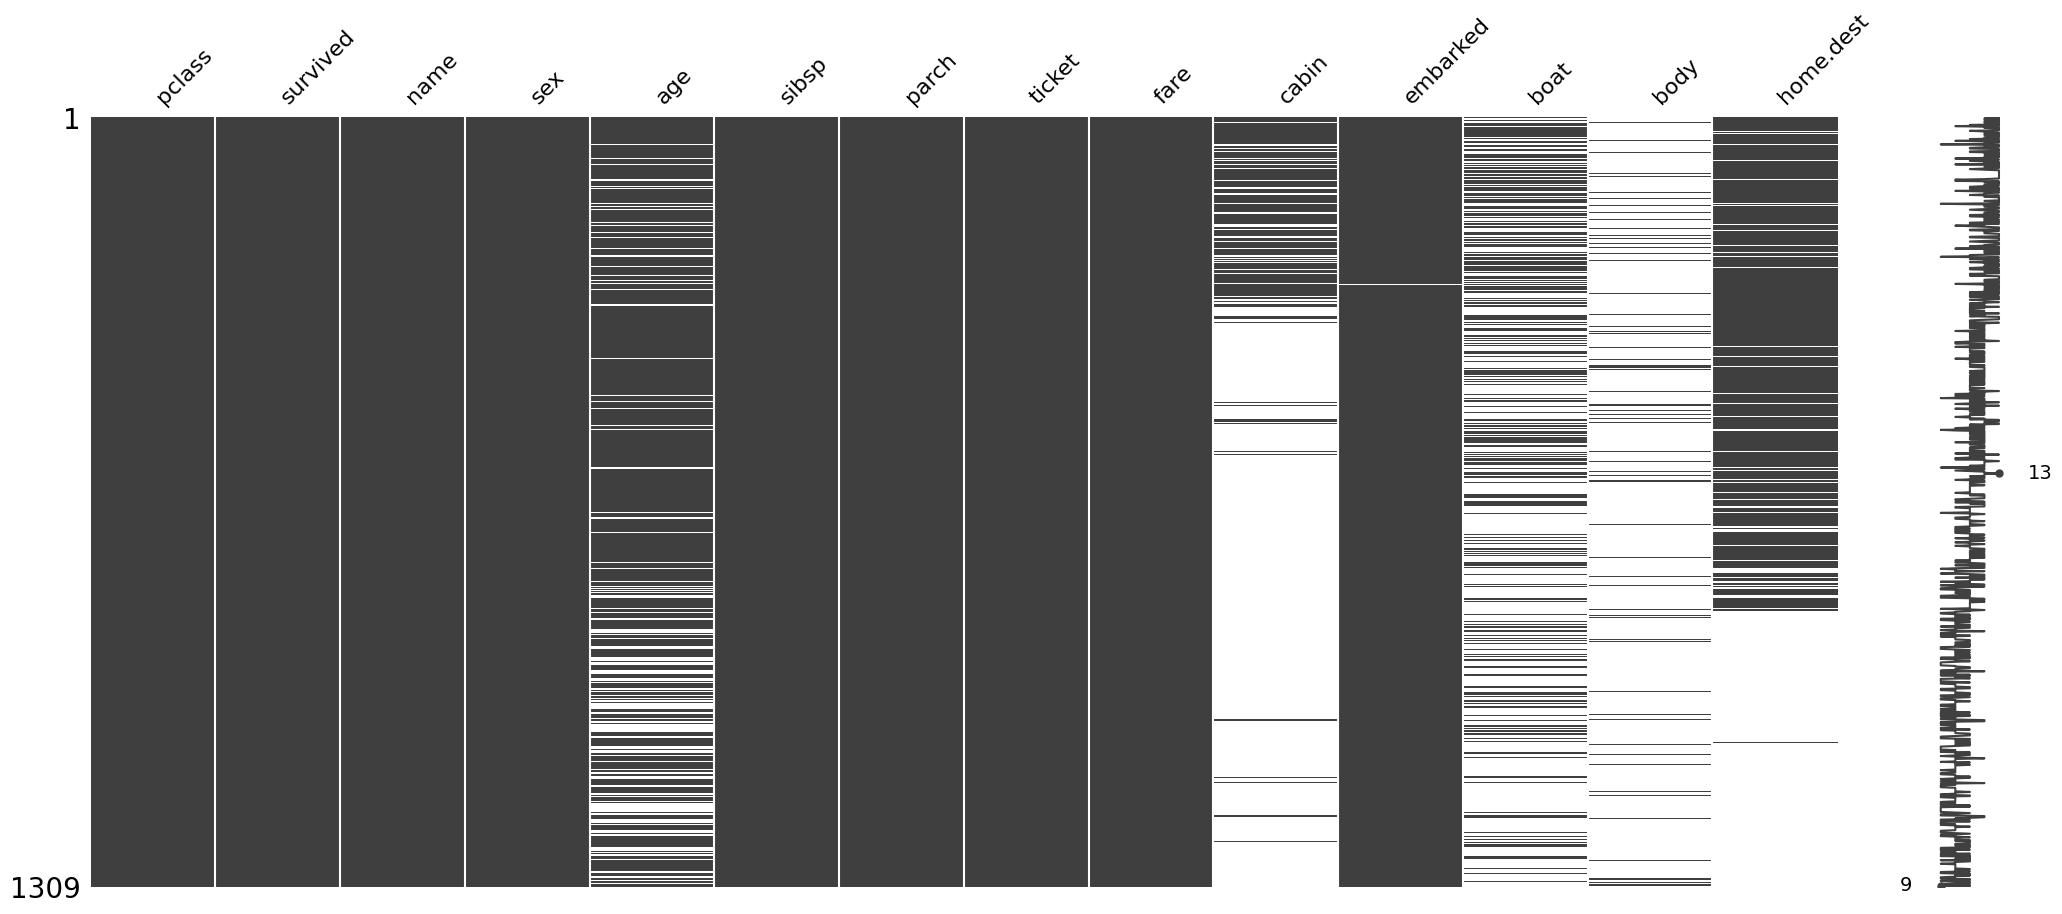

In [8]:
msno.matrix(df)
plt.show()

In [9]:
logger.info("NULL: ")

logger.info(df.isnull().sum())
logger.info("DUPLICATED: ")
logger.info(df.duplicated().sum())


           INFO     NULL:                                                                           ]8;id=955870;file:///tmp/ipykernel_6919/3989102858.py\3989102858.py]8;;\:]8;id=161887;file:///tmp/ipykernel_6919/3989102858.py#1\1]8;;\

           INFO     pclass          0                                                               ]8;id=571525;file:///tmp/ipykernel_6919/3989102858.py\3989102858.py]8;;\:]8;id=527513;file:///tmp/ipykernel_6919/3989102858.py#3\3]8;;\
                    survived        0                                                                              
                    name            0                                                                              
                    sex             0                                                                              
                    age           263                                                                              
                    sibsp           0                                                                              
                    parch           0                                                                              
                    ticket          0                                                                              
                    fare            1                                                                              
                    cabin        1014                                                                              
                    embarked        2                                                                              
                    boat          823                                                                              
                    body         1188                                                                              
                    home.dest     564                                                                              
                    dtype: int64                                                                                   

           INFO     DUPLICATED:                                                                     ]8;id=398181;file:///tmp/ipykernel_6919/3989102858.py\3989102858.py]8;;\:]8;id=36232;file:///tmp/ipykernel_6919/3989102858.py#4\4]8;;\

           INFO     0                                                                               ]8;id=313192;file:///tmp/ipykernel_6919/3989102858.py\3989102858.py]8;;\:]8;id=788611;file:///tmp/ipykernel_6919/3989102858.py#5\5]8;;\

## PClass to OneHotEncoder! Its much clearer what is happening

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['pclass']]).toarray()).add_prefix('class_')
df = df.join(enc_df)
df = df.drop(columns = ['pclass'])
Pclasses = ['class_0','class_1','class_2']


In [11]:
df['survived'] = df['survived'].astype('int8')


In [12]:
df['sibsp'] = df['sibsp'].astype('int8')
df['sex'] = df['sex'].map({'male': 0,'female': 1}) 
df['sex'] = df['sex'].astype('int8')


In [13]:
#Body means that the body was found, so if it not null this means the survived is 0. Remove it
# if did not survive and body was recovered

bodys = df[(~df['body'].isna()) & (df['survived'] == 1)]
if bodys.shape[0] == 0:
    logger.warning("Droping body, as this info is not needed")
    df = df.drop(columns = ['body'], axis = 1,  errors='ignore')

#drop it as there is no needed information

           WARNING  Droping body, as this info is not needed                                          ]8;id=37381;file:///tmp/ipykernel_6919/30988630.py\30988630.py]8;;\:]8;id=82314;file:///tmp/ipykernel_6919/30988630.py#6\6]8;;\

In [14]:
#Boat is not needed as we are trying to get info if survived, so if boat is not null its survived, right? Not really.. there are people which did not survived on boat... what to do with that?
boats = df[(~df['boat'].isna()) & (df['survived'] == 0)]
display(boats)
boats['boat'].value_counts()
#Those info are random... leave it...

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
19,0,"Beattie, Mr. Thomson",0,36.0,0,0,13050,75.2417,C6,C,A,"Winnipeg, MN",1.0,0.0,0.0
166,0,"Hoyt, Mr. William Fisher",0,NaN,0,0,PC 17600,30.6958,NaN,C,14,"New York, NY",1.0,0.0,0.0
544,0,"Renouf, Mr. Peter Henry",0,34.0,1,0,31027,21.0000,NaN,S,12,"Elizabeth, NJ",0.0,1.0,0.0
655,0,"Backstrom, Mr. Karl Alfred",0,32.0,1,0,3101278,15.8500,NaN,S,D,"Ruotsinphytaa, Finland New York, NY",0.0,0.0,1.0
853,0,"Harmer, Mr. Abraham (David Lishin)",0,25.0,0,0,374887,7.2500,NaN,S,B,NaN,0.0,0.0,1.0
921,0,"Keefe, Mr. Arthur",0,NaN,0,0,323592,7.2500,NaN,S,A,NaN,0.0,0.0,1.0
968,0,"Lindell, Mr. Edvard Bengtsson",0,36.0,1,0,349910,15.5500,NaN,S,A,NaN,0.0,0.0,1.0
969,0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)",1,30.0,1,0,349910,15.5500,NaN,S,A,NaN,0.0,0.0,1.0
1299,0,"Yasbeck, Mr. Antoni",0,27.0,1,0,2659,14.4542,NaN,C,C,NaN,0.0,0.0,1.0


boat
A     4
14    1
12    1
D     1
B     1
C     1
Name: count, dtype: int64

In [15]:
#Boat per  class?
survived_with_boat = df[(~df['boat'].isna()) & (df['survived'] == 1)]
for _boat in survived_with_boat['boat'].unique():
    for _sex in [0,1]:
        for _pclass in Pclasses:
            logger.info(f"BOAT: {_boat} P_CLASS: {_pclass} SEX: {_sex}")
            survived_with_boat_cond = (survived_with_boat['sex'] == _sex) & (survived_with_boat[_pclass] == 1) & (survived_with_boat['boat'] == _boat)
            boat_survival = survived_with_boat.loc[survived_with_boat_cond]
            if boat_survival.shape[0] > 0:
                display(boat_survival)
#Nothing fancy....

           INFO     BOAT: 2 P_CLASS: class_0 SEX: 0                                                 ]8;id=506178;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=488222;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 2 P_CLASS: class_1 SEX: 0                                                 ]8;id=649937;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=948162;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 2 P_CLASS: class_2 SEX: 0                                                 ]8;id=932726;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=475927;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
733,1,"Coutts, Master. Eden Leslie 'Neville'",0,9.0,1,1,C.A. 37671,15.900,NaN,S,2,"England Brooklyn, NY",0.0,0.0,1.0
734,1,"Coutts, Master. William Loch 'William'",0,3.0,1,1,C.A. 37671,15.900,NaN,S,2,"England Brooklyn, NY",0.0,0.0,1.0
935,1,"Kink-Heilmann, Mr. Anton",0,29.0,3,1,315153,22.025,NaN,S,2,NaN,0.0,0.0,1.0


           INFO     BOAT: 2 P_CLASS: class_0 SEX: 1                                                 ]8;id=902244;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=61425;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
0,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1.0,0.0,0.0
79,1,"Cornell, Mrs. Robert Clifford (Malvina Helen Lamson)",1,55.0,2,0,11770,25.7000,C101,S,2,"New York, NY",1.0,0.0,0.0
98,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",1,48.0,1,0,PC 17761,106.4250,C86,C,2,"Deephaven, MN / Cedar Rapids, IA",1.0,0.0,0.0
180,1,"Kreuchen, Miss. Emilie",1,39.0,0,0,24160,211.3375,NaN,S,2,NaN,1.0,0.0,0.0
182,1,"LeRoy, Miss. Bertha",1,30.0,0,0,PC 17761,106.4250,NaN,C,2,NaN,1.0,0.0,0.0
193,1,"Madill, Miss. Georgette Alexandra",1,15.0,0,1,24160,211.3375,B5,S,2,"St Louis, MO",1.0,0.0,0.0
238,1,"Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)",1,43.0,0,1,24160,211.3375,B3,S,2,"St Louis, MO",1.0,0.0,0.0


           INFO     BOAT: 2 P_CLASS: class_1 SEX: 1                                                 ]8;id=211879;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=340545;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 2 P_CLASS: class_2 SEX: 1                                                 ]8;id=107793;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=225721;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
735,1,"Coutts, Mrs. William (Winnie 'Minnie' Treanor)",1,36.0,0,2,C.A. 37671,15.900,NaN,S,2,"England Brooklyn, NY",0.0,0.0,1.0
934,1,"Kink-Heilmann, Miss. Luise Gretchen",1,4.0,0,2,315153,22.025,NaN,S,2,NaN,0.0,0.0,1.0
936,1,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",1,26.0,1,1,315153,22.025,NaN,S,2,NaN,0.0,0.0,1.0


           INFO     BOAT: 11 P_CLASS: class_0 SEX: 0                                                ]8;id=157599;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=767764;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.55,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0
209,1,"Mock, Mr. Philipp Edmund",0,30.0000,1,0,13236,57.75,C78,C,11,"New York, NY",1.0,0.0,0.0


           INFO     BOAT: 11 P_CLASS: class_1 SEX: 0                                                ]8;id=483927;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=349547;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
339,1,"Becker, Master. Richard F",0,1.0,2,1,230136,39.0,F4,S,11,"Guntur, India / Benton Harbour, MI",0.0,1.0,0.0


           INFO     BOAT: 11 P_CLASS: class_2 SEX: 0                                                ]8;id=674163;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=4230;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
611,1,"Aks, Master. Philip Frank",0,0.8333,0,1,392091,9.35,NaN,S,11,"London, England Norfolk, VA",0.0,0.0,1.0
760,1,"de Mulder, Mr. Theodore",0,30.0000,0,0,345774,9.50,NaN,S,11,"Belgium Detroit, MI",0.0,0.0,1.0
1190,1,"Sap, Mr. Julius",0,25.0000,0,0,345768,9.50,NaN,S,11,NaN,0.0,0.0,1.0
1196,1,"Sheerlinck, Mr. Jan Baptist",0,29.0000,0,0,345779,9.50,NaN,S,11,NaN,0.0,0.0,1.0


           INFO     BOAT: 11 P_CLASS: class_0 SEX: 1                                                ]8;id=982711;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=475211;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
73,1,"Cleaver, Miss. Alice",1,22.0,0,0,113781,151.5500,NaN,S,11,NaN,1.0,0.0,0.0
242,1,"Rosenbaum, Miss. Edith Louise",1,33.0,0,0,PC 17613,27.7208,A11,C,11,"Paris, France",1.0,0.0,0.0
257,1,"Schabert, Mrs. Paul (Emma Mock)",1,35.0,1,0,13236,57.7500,C28,C,11,"New York, NY",1.0,0.0,0.0
263,1,"Silvey, Mrs. William Baird (Alice Munger)",1,39.0,1,0,13507,55.9000,E44,S,11,"Duluth, MN",1.0,0.0,0.0


           INFO     BOAT: 11 P_CLASS: class_1 SEX: 1                                                ]8;id=525542;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=459596;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
329,1,"Angle, Mrs. William A (Florence 'Mary' Agnes Hughes)",1,36.0,1,0,226875,26.0000,NaN,S,11,"Warwick, England",0.0,1.0,0.0
340,1,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,39.0000,F4,S,11,"Guntur, India / Benton Harbour, MI",0.0,1.0,0.0
342,1,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",1,36.0,0,3,230136,39.0000,F4,S,11,"Guntur, India / Benton Harbour, MI",0.0,1.0,0.0
349,1,"Brown, Miss. Amelia 'Mildred'",1,24.0,0,0,248733,13.0000,F33,S,11,"London / Montreal, PQ",0.0,1.0,0.0
430,1,"Harper, Miss. Annie Jessie 'Nina'",1,6.0,0,1,248727,33.0000,NaN,S,11,"Denmark Hill, Surrey / Chicago",0.0,1.0,0.0
465,1,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",1,23.0,0,0,SC/AH Basle 541,13.7917,D,C,11,"New York, NY",0.0,1.0,0.0
483,1,"Leitch, Miss. Jessie Wills",1,NaN,0,0,248727,33.0000,NaN,S,11,"London / Chicago, IL",0.0,1.0,0.0
521,1,"Nye, Mrs. (Elizabeth Ramell)",1,29.0,0,0,C.A. 29395,10.5000,F33,S,11,"Folkstone, Kent / New York, NY",0.0,1.0,0.0
534,1,"Phillips, Miss. Kate Florence ('Mrs Kate Louise Phillips Marshall')",1,19.0,0,0,250655,26.0000,NaN,S,11,"Worcester, England",0.0,1.0,0.0
540,1,"Quick, Miss. Phyllis May",1,2.0,1,1,26360,26.0000,NaN,S,11,"Plymouth, Devon / Detroit, MI",0.0,1.0,0.0


           INFO     BOAT: 11 P_CLASS: class_2 SEX: 1                                                ]8;id=674129;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=88261;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
851,1,"Hansen, Mrs. Claus Peter (Jennie L Howard)",1,45.0,1,0,350026,14.1083,NaN,S,11,NaN,0.0,0.0,1.0


           INFO     BOAT: 3 P_CLASS: class_0 SEX: 0                                                 ]8;id=706812;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=935309;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
5,1,"Anderson, Mr. Harry",0,48.0,0,0,19952,26.5500,E12,S,3,"New York, NY",1.0,0.0,0.0
49,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,"Austria-Hungary / Germantown, Philadelphia, PA",1.0,0.0,0.0
87,1,"Daniel, Mr. Robert Williams",0,27.0,0,0,113804,30.5000,NaN,S,3,"Philadelphia, PA",1.0,0.0,0.0
91,1,"Dick, Mr. Albert Adrian",0,31.0,1,0,17474,57.0000,B20,S,3,"Calgary, AB",1.0,0.0,0.0
145,1,"Harper, Mr. Henry Sleeper",0,48.0,1,0,PC 17572,76.7292,D33,C,3,"New York, NY",1.0,0.0,0.0
151,1,"Hassab, Mr. Hammad",0,27.0,0,0,PC 17572,76.7292,D49,C,3,NaN,1.0,0.0,0.0
152,1,"Hawksford, Mr. Walter James",0,NaN,0,0,16988,30.0000,D45,S,3,"Kingston, Surrey",1.0,0.0,0.0
183,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,1.0,0.0,0.0
254,1,"Saalfeld, Mr. Adolphe",0,NaN,0,0,19988,30.5000,C106,S,3,"Manchester, England",1.0,0.0,0.0
264,1,"Simonius-Blumer, Col. Oberst Alfons",0,56.0,0,0,13213,35.5000,A26,C,3,"Basel, Switzerland",1.0,0.0,0.0


           INFO     BOAT: 3 P_CLASS: class_1 SEX: 0                                                 ]8;id=993803;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=225924;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 3 P_CLASS: class_2 SEX: 0                                                 ]8;id=171844;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=200724;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 3 P_CLASS: class_0 SEX: 1                                                 ]8;id=475650;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=49139;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
44,1,"Burns, Miss. Elizabeth Margaret",1,41.0,0,0,16966,134.5000,E40,C,3,NaN,1.0,0.0,0.0
50,1,"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",1,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,"Germantown, Philadelphia, PA",1.0,0.0,0.0
90,1,"Davidson, Mrs. Thornton (Orian Hays)",1,27.0,1,2,F.C. 12750,52.0000,B71,S,3,"Montreal, PQ",1.0,0.0,0.0
92,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",1,17.0,1,0,17474,57.0000,B20,S,3,"Calgary, AB",1.0,0.0,0.0
137,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,3,"Greenwich, CT",1.0,0.0,0.0
139,1,"Graham, Mrs. William Thompson (Edith Junkins)",1,58.0,0,1,PC 17582,153.4625,C125,S,3,"Greenwich, CT",1.0,0.0,0.0
146,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,C,3,"New York, NY",1.0,0.0,0.0
155,1,"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",1,52.0,1,1,12749,93.5000,B69,S,3,"Montreal, PQ",1.0,0.0,0.0
230,1,"Perreault, Miss. Anne",1,30.0,0,0,12749,93.5000,B73,S,3,NaN,1.0,0.0,0.0
260,1,"Shutes, Miss. Elizabeth W",1,40.0,0,0,PC 17582,153.4625,C125,S,3,"New York, NY / Greenwich CT",1.0,0.0,0.0


           INFO     BOAT: 3 P_CLASS: class_1 SEX: 1                                                 ]8;id=453497;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=616298;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 3 P_CLASS: class_2 SEX: 1                                                 ]8;id=328377;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=758386;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 10 P_CLASS: class_0 SEX: 0                                                ]8;id=847333;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=280442;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 10 P_CLASS: class_1 SEX: 0                                                ]8;id=713622;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=236150;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
398,1,"Drew, Master. Marshall Brines",0,8.0,0,2,28220,32.5000,NaN,S,10,"Greenport, NY",0.0,1.0,0.0
454,1,"Hosono, Mr. Masabumi",0,42.0,0,0,237798,13.0000,NaN,S,10,"Tokyo, Japan",0.0,1.0,0.0
492,1,"Mallet, Master. Andre",0,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,10,"Paris / Montreal, PQ",0.0,1.0,0.0


           INFO     BOAT: 10 P_CLASS: class_2 SEX: 0                                                ]8;id=357718;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=115871;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
762,1,"Dean, Master. Bertram Vere",0,1.0,1,2,C.A. 2315,20.5750,NaN,S,10,"Devon, England Wichita, KS",0.0,0.0,1.0
941,1,"Krekorian, Mr. Neshan",0,25.0,0,0,2654,7.2292,F E57,C,10,NaN,0.0,0.0,1.0


           INFO     BOAT: 10 P_CLASS: class_0 SEX: 1                                                ]8;id=781800;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=493007;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
6,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,13502,77.9583,D7,S,10,"Hudson, NY",1.0,0.0,0.0
111,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,"Winnipeg, MB",1.0,0.0,0.0
112,1,"Fortune, Miss. Ethel Flora",1,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,"Winnipeg, MB",1.0,0.0,0.0
113,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,"Winnipeg, MB",1.0,0.0,0.0
116,1,"Fortune, Mrs. Mark (Mary McDougald)",1,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,"Winnipeg, MB",1.0,0.0,0.0
161,1,"Hogeboom, Mrs. John C (Anna Andrews)",1,51.0,1,0,13502,77.9583,D11,S,10,"Hudson, NY",1.0,0.0,0.0
190,1,"Longley, Miss. Gretchen Fiske",1,21.0,0,0,13502,77.9583,D9,S,10,"Hudson, NY",1.0,0.0,0.0
198,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmichael Farquarson)",1,18.0,1,0,113773,53.1000,D30,S,10,"New York, NY",1.0,0.0,0.0


           INFO     BOAT: 10 P_CLASS: class_1 SEX: 1                                                ]8;id=702547;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=141794;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
324,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",1,28.0000,1,0,P/PP 3381,24.0000,NaN,C,10,"Russia New York, NY",0.0,1.0,0.0
333,1,"Ball, Mrs. (Ada E Hall)",1,36.0000,0,0,28551,13.0000,D,S,10,"Bristol, Avon / Jacksonville, FL",0.0,1.0,0.0
400,1,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",1,34.0000,1,1,28220,32.5000,NaN,S,10,"Greenport, NY",0.0,1.0,0.0
452,1,"Hold, Mrs. Stephen (Annie Margaret Hill)",1,29.0000,1,0,26707,26.0000,NaN,S,10,"England / Sacramento, CA",0.0,1.0,0.0
469,1,"Keane, Miss. Nora A",1,NaN,0,0,226593,12.3500,E101,Q,10,"Harrisburg, PA",0.0,1.0,0.0
494,1,"Mallet, Mrs. Albert (Antoinette Magnin)",1,24.0000,1,1,S.C./PARIS 2079,37.0042,NaN,C,10,"Paris / Montreal, PQ",0.0,1.0,0.0
560,1,"Sinkkonen, Miss. Anna",1,30.0000,0,0,250648,13.0000,NaN,S,10,"Finland / Washington, DC",0.0,1.0,0.0
580,1,"Ware, Mrs. John James (Florence Louise Long)",1,31.0000,0,0,CA 31352,21.0000,NaN,S,10,"Bristol, England / New Britain, CT",0.0,1.0,0.0
586,1,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",1,29.0000,1,0,228414,26.0000,NaN,S,10,"Bromsgrove, England / Montreal, PQ",0.0,1.0,0.0
590,1,"West, Miss. Barbara J",1,0.9167,1,2,C.A. 34651,27.7500,NaN,S,10,"Bournmouth, England",0.0,1.0,0.0


           INFO     BOAT: 10 P_CLASS: class_2 SEX: 1                                                ]8;id=608511;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=162164;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
763,1,"Dean, Miss. Elizabeth Gladys 'Millvina'",1,0.1667,1,2,C.A. 2315,20.5750,NaN,S,10,"Devon, England Wichita, KS",0.0,0.0,1.0
765,1,"Dean, Mrs. Bertram (Eva Georgetta Light)",1,33.0000,1,2,C.A. 2315,20.5750,NaN,S,10,"Devon, England Wichita, KS",0.0,0.0,1.0
980,1,"Lundin, Miss. Olga Elida",1,23.0000,0,0,347469,7.8542,NaN,S,10,NaN,0.0,0.0,1.0
1247,1,"Thorneycroft, Mrs. Percival (Florence Kate White)",1,NaN,1,0,376564,16.1000,NaN,S,10,NaN,0.0,0.0,1.0


           INFO     BOAT: D P_CLASS: class_0 SEX: 0                                                 ]8;id=490507;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=717755;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
29,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",0,28.0,0,0,110564,26.55,C52,S,D,"Stockholm, Sweden / Washington, DC",1.0,0.0,0.0
165,1,"Hoyt, Mr. Frederick Maxfield",0,38.0,1,0,19943,90.00,C93,S,D,"New York, NY / Stamford CT",1.0,0.0,0.0
320,1,"Woolner, Mr. Hugh",0,NaN,0,0,19947,35.50,C52,S,D,"London, England",1.0,0.0,0.0


           INFO     BOAT: D P_CLASS: class_1 SEX: 0                                                 ]8;id=975116;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=660728;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
514,1,"Navratil, Master. Edmond Roger",0,2.0,1,1,230080,26.0,F2,S,D,"Nice, France",0.0,1.0,0.0
515,1,"Navratil, Master. Michel M",0,3.0,1,1,230080,26.0,F2,S,D,"Nice, France",0.0,1.0,0.0


           INFO     BOAT: D P_CLASS: class_2 SEX: 0                                                 ]8;id=625341;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=366901;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
783,1,"Duquemin, Mr. Joseph",0,24.0,0,0,S.O./P.P. 752,7.55,NaN,S,D,"England Albion, NY",0.0,0.0,1.0


           INFO     BOAT: D P_CLASS: class_0 SEX: 1                                                 ]8;id=272197;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=557841;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.0,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",1.0,0.0,0.0
42,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",1,59.0,2,0,11769,51.4792,C101,S,D,"Belmont, MA",1.0,0.0,0.0
127,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,D,"Scituate, MA",1.0,0.0,0.0
149,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",1,35.0,1,0,36973,83.4750,C83,S,D,"New York, NY",1.0,0.0,0.0
167,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",1,35.0,1,0,19943,90.0000,C93,S,D,"New York, NY / Stamford CT",1.0,0.0,0.0
297,1,"Thorne, Mrs. Gertrude Maybelle",1,NaN,0,0,PC 17585,79.2000,NaN,C,D,"New York, NY",1.0,0.0,0.0


           INFO     BOAT: D P_CLASS: class_1 SEX: 1                                                 ]8;id=658328;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=998734;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: D P_CLASS: class_2 SEX: 1                                                 ]8;id=278033;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=427607;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
625,1,"Andersson, Miss. Erna Alexandra",1,17.0,4,2,3101281,7.9250,NaN,S,D,"Ruotsinphyhtaa, Finland New York, NY",0.0,0.0,1.0
886,1,"Jermyn, Miss. Annie",1,NaN,0,0,14313,7.7500,NaN,Q,D,NaN,0.0,0.0,1.0
923,1,"Kelly, Miss. Mary",1,NaN,0,0,14312,7.7500,NaN,Q,D,NaN,0.0,0.0,1.0
1060,1,"Nilsson, Miss. Berta Olivia",1,18.0,0,0,347066,7.7750,NaN,S,D,NaN,0.0,0.0,1.0
1077,1,"O'Driscoll, Miss. Bridget",1,NaN,0,0,14311,7.7500,NaN,Q,D,NaN,0.0,0.0,1.0
1122,1,"Peter, Miss. Anna",1,NaN,1,1,2668,22.3583,F E69,C,D,NaN,0.0,0.0,1.0
1123,1,"Peter, Mrs. Catherine (Catherine Rizk)",1,NaN,0,2,2668,22.3583,NaN,C,D,NaN,0.0,0.0,1.0


           INFO     BOAT: 4 P_CLASS: class_0 SEX: 0                                                 ]8;id=676812;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=477572;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
54,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.000,B96 B98,S,4,"Bryn Mawr, PA",1.0,0.0,0.0
249,1,"Ryerson, Master. John Borie",0,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,"Haverford, PA / Cooperstown, NY",1.0,0.0,0.0


           INFO     BOAT: 4 P_CLASS: class_1 SEX: 0                                                 ]8;id=604339;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=69147;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
427,1,"Hamalainen, Master. Viljo",0,0.6667,1,1,250649,14.50,NaN,S,4,"Detroit, MI",0.0,1.0,0.0
548,1,"Richards, Master. George Sibley",0,0.8333,1,1,29106,18.75,NaN,S,4,"Cornwall / Akron, OH",0.0,1.0,0.0
549,1,"Richards, Master. William Rowe",0,3.0000,1,1,29106,18.75,NaN,S,4,"Cornwall / Akron, OH",0.0,1.0,0.0


           INFO     BOAT: 4 P_CLASS: class_2 SEX: 0                                                 ]8;id=785886;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=309386;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 4 P_CLASS: class_0 SEX: 1                                                 ]8;id=948941;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=610509;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
11,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,"New York, NY",1.0,0.0,0.0
23,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,1.0,0.0,0.0
35,1,"Bowen, Miss. Grace Scott",1,45.0,0,0,PC 17608,262.3750,NaN,C,4,"Cooperstown, NY",1.0,0.0,0.0
55,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S,4,"Bryn Mawr, PA",1.0,0.0,0.0
57,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.0000,B96 B98,S,4,"Bryn Mawr, PA",1.0,0.0,0.0
63,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)",1,47.0,1,0,W.E.P. 5734,61.1750,E31,S,4,"Amenia, ND",1.0,0.0,0.0
66,1,"Chaudanson, Miss. Victorine",1,36.0,0,0,PC 17608,262.3750,B61,C,4,NaN,1.0,0.0,0.0
72,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",1,26.0,1,0,13508,136.7792,C89,C,4,"Los Angeles, CA",1.0,0.0,0.0
85,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C85,C,4,"New York, NY",1.0,0.0,0.0
103,1,"Endres, Miss. Caroline Louise",1,38.0,0,0,PC 17757,227.5250,C45,C,4,"New York, NY",1.0,0.0,0.0


           INFO     BOAT: 4 P_CLASS: class_1 SEX: 1                                                 ]8;id=505637;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=486360;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
428,1,"Hamalainen, Mrs. William (Anna)",1,24.0,0,2,250649,14.50,NaN,S,4,"Detroit, MI",0.0,1.0,0.0
446,1,"Hocking, Miss. Ellen 'Nellie'",1,20.0,2,1,29105,23.00,NaN,S,4,"Cornwall / Akron, OH",0.0,1.0,0.0
449,1,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.0,1,3,29105,23.00,NaN,S,4,"Cornwall / Akron, OH",0.0,1.0,0.0
550,1,"Richards, Mrs. Sidney (Emily Hocking)",1,24.0,2,3,29106,18.75,NaN,S,4,"Cornwall / Akron, OH",0.0,1.0,0.0


           INFO     BOAT: 4 P_CLASS: class_2 SEX: 1                                                 ]8;id=776293;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=367825;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 9 P_CLASS: class_0 SEX: 0                                                 ]8;id=542115;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=480222;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
37,1,"Bradley, Mr. George ('George Arthur Brayton')",0,NaN,0,0,111427,26.55,NaN,S,9,"Los Angeles, CA",1.0,0.0,0.0
240,1,"Romaine, Mr. Charles Hallace ('Mr C Rolmane')",0,45.0,0,0,111428,26.55,NaN,S,9,"New York, NY",1.0,0.0,0.0


           INFO     BOAT: 9 P_CLASS: class_1 SEX: 0                                                 ]8;id=826699;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=318;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
376,1,"Collett, Mr. Sidney C Stuart",0,24.0,0,0,28034,10.5000,NaN,S,9,"London / Fort Byron, NY",0.0,1.0,0.0
524,1,"Padro y Manent, Mr. Julian",0,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,9,"Spain / Havana, Cuba",0.0,1.0,0.0
526,1,"Pallas y Castello, Mr. Emilio",0,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C,9,"Spain / Havana, Cuba",0.0,1.0,0.0
596,1,"Wilhelms, Mr. Charles",0,31.0,0,0,244270,13.0000,NaN,S,9,"London, England",0.0,1.0,0.0


           INFO     BOAT: 9 P_CLASS: class_2 SEX: 0                                                 ]8;id=810103;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=603193;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
1064,1,"Niskanen, Mr. Juha",0,39.0,0,0,STON/O 2. 3101289,7.925,NaN,S,9,NaN,0.0,0.0,1.0
1131,1,"Pickard, Mr. Berk (Berk Trembisky)",0,32.0,0,0,SOTON/O.Q. 392078,8.050,E10,S,9,NaN,0.0,0.0,1.0
1228,1,"Stranden, Mr. Juho",0,31.0,0,0,STON/O 2. 3101288,7.925,NaN,S,9,NaN,0.0,0.0,1.0


           INFO     BOAT: 9 P_CLASS: class_0 SEX: 1                                                 ]8;id=871841;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=760904;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
12,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3,B35,C,9,"Paris, France",1.0,0.0,0.0
187,1,"Lines, Miss. Mary Conover",1,16.0,0,1,PC 17592,39.4,D28,S,9,"Paris, France",1.0,0.0,0.0
188,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",1,51.0,0,1,PC 17592,39.4,D28,S,9,"Paris, France",1.0,0.0,0.0
255,1,"Sagesser, Mlle. Emma",1,24.0,0,0,PC 17477,69.3,B35,C,9,NaN,1.0,0.0,0.0


[13:47:30] INFO     BOAT: 9 P_CLASS: class_1 SEX: 1                                                 ]8;id=834022;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=108466;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
355,1,"Buss, Miss. Kate",1,36.0,0,0,27849,13.00,NaN,S,9,"Sittingbourne, England / San Diego, CA",0.0,1.0,0.0
437,1,"Herman, Miss. Alice",1,24.0,1,2,220845,65.00,NaN,S,9,"Somerset / Bernardsville, NJ",0.0,1.0,0.0
438,1,"Herman, Miss. Kate",1,24.0,1,2,220845,65.00,NaN,S,9,"Somerset / Bernardsville, NJ",0.0,1.0,0.0
440,1,"Herman, Mrs. Samuel (Jane Laver)",1,48.0,1,2,220845,65.00,NaN,S,9,"Somerset / Bernardsville, NJ",0.0,1.0,0.0
471,1,"Kelly, Mrs. Florence 'Fannie'",1,45.0,0,0,223596,13.50,NaN,S,9,"London / New York, NY",0.0,1.0,0.0
536,1,"Pinsky, Mrs. (Rosa)",1,32.0,0,0,234604,13.00,NaN,S,9,Russia,0.0,1.0,0.0
546,1,"Reynaldo, Ms. Encarnacion",1,28.0,0,0,230434,13.00,NaN,S,9,Spain,0.0,1.0,0.0
564,1,"Smith, Miss. Marion Elsie",1,40.0,0,0,31418,13.00,NaN,S,9,NaN,0.0,1.0,0.0
570,1,"Toomey, Miss. Ellen",1,50.0,0,0,F.C.C. 13531,10.50,NaN,S,9,"Indianapolis, IN",0.0,1.0,0.0
582,1,"Watt, Miss. Bertha J",1,12.0,0,0,C.A. 33595,15.75,NaN,S,9,"Aberdeen / Portland, OR",0.0,1.0,0.0


           INFO     BOAT: 9 P_CLASS: class_2 SEX: 1                                                 ]8;id=241625;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=951710;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 6 P_CLASS: class_0 SEX: 0                                                 ]8;id=104332;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=600740;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
231,1,"Peuchen, Major. Arthur Godfrey",0,52.0,0,0,113786,30.5,C104,S,6,"Toronto, ON",1.0,0.0,0.0


           INFO     BOAT: 6 P_CLASS: class_1 SEX: 0                                                 ]8;id=278624;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=601918;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 6 P_CLASS: class_2 SEX: 0                                                 ]8;id=587206;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=712767;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
953,1,"Leeni, Mr. Fahim ('Philip Zenni')",0,22.0,0,0,2620,7.225,NaN,C,6,NaN,0.0,0.0,1.0


           INFO     BOAT: 6 P_CLASS: class_0 SEX: 1                                                 ]8;id=588954;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=237667;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
13,1,"Barber, Miss. Ellen 'Nellie'",1,26.0,0,0,19877,78.8500,NaN,S,6,NaN,1.0,0.0,0.0
17,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,"Montreal, PQ",1.0,0.0,0.0
36,1,"Bowerman, Miss. Elsie Edith",1,22.0,0,1,113505,55.0000,E33,S,6,"St Leonards-on-Sea, England Ohio",1.0,0.0,0.0
41,1,"Brown, Mrs. James Joseph (Margaret Tobin)",1,44.0,0,0,PC 17610,27.7208,B4,C,6,"Denver, CO",1.0,0.0,0.0
48,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",1,53.0,0,0,PC 17606,27.4458,NaN,C,6,"Washington, DC",1.0,0.0,0.0
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence Siegel)",1,76.0,1,0,19877,78.8500,C46,S,6,"Little Onn Hall, Staffs",1.0,0.0,0.0
69,1,"Chibnall, Mrs. (Edith Martha Bowerman)",1,NaN,0,1,113505,55.0000,E33,S,6,"St Leonards-on-Sea, England Ohio",1.0,0.0,0.0
97,1,"Douglas, Mrs. Frederick Charles (Mary Helene Baxter)",1,27.0,1,1,PC 17558,247.5208,B58 B60,C,6,"Montreal, PQ",1.0,0.0,0.0
168,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN,6,NaN,1.0,0.0,0.0
186,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",1,55.0,0,0,112377,27.7208,NaN,C,6,"Stockholm, Sweden",1.0,0.0,0.0


           INFO     BOAT: 6 P_CLASS: class_1 SEX: 1                                                 ]8;id=814812;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=783283;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 6 P_CLASS: class_2 SEX: 1                                                 ]8;id=578978;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=517965;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: B P_CLASS: class_0 SEX: 0                                                 ]8;id=94399;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=39984;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
14,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,S,B,"Hessle, Yorks",1.0,0.0,0.0
136,1,"Gracie, Col. Archibald IV",0,53.0,0,0,113780,28.5000,C51,C,B,"Washington, DC",1.0,0.0,0.0
295,1,"Thayer, Mr. John Borland Jr",0,17.0,0,2,17421,110.8833,C70,C,B,"Haverford, PA",1.0,0.0,0.0


           INFO     BOAT: B P_CLASS: class_1 SEX: 0                                                 ]8;id=245749;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=948889;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
503,1,"Mellors, Mr. William John",0,19.0,0,0,SW/PP 751,10.5,NaN,S,B,"Chelsea, London",0.0,1.0,0.0


           INFO     BOAT: B P_CLASS: class_2 SEX: 0                                                 ]8;id=433934;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=348316;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
777,1,"Dorking, Mr. Edward Arthur",0,19.0,0,0,A/5. 10482,8.050,NaN,S,B,"England Oglesby, IL",0.0,0.0,1.0
1033,1,"Moss, Mr. Albert Johan",0,NaN,0,0,312991,7.775,NaN,S,B,NaN,0.0,0.0,1.0
1080,1,"O'Keefe, Mr. Patrick",0,NaN,0,0,368402,7.750,NaN,Q,B,NaN,0.0,0.0,1.0
1232,1,"Sunderland, Mr. Victor Francis",0,16.0,0,0,SOTON/OQ 392089,8.050,NaN,S,B,NaN,0.0,0.0,1.0


           INFO     BOAT: B P_CLASS: class_0 SEX: 1                                                 ]8;id=163616;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=554331;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: B P_CLASS: class_1 SEX: 1                                                 ]8;id=357220;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=417422;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: B P_CLASS: class_2 SEX: 1                                                 ]8;id=755909;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=44529;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 P_CLASS: class_0 SEX: 0                                                 ]8;id=396297;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=327873;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 P_CLASS: class_1 SEX: 0                                                 ]8;id=865920;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=917003;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 P_CLASS: class_2 SEX: 0                                                 ]8;id=643425;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=542046;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 P_CLASS: class_0 SEX: 1                                                 ]8;id=991765;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=964622;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
18,1,"Bazzani, Miss. Albina",1,32.0,0,0,11813,76.2917,D15,C,8,NaN,1.0,0.0,0.0
24,1,"Bird, Miss. Ellen",1,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,1.0,0.0,0.0
28,1,"Bissette, Miss. Amelia",1,35.0,0,0,PC 17760,135.6333,C99,S,8,NaN,1.0,0.0,0.0
32,1,"Bonnell, Miss. Caroline",1,30.0,0,0,36928,164.8667,C7,S,8,"Youngstown, OH",1.0,0.0,0.0
33,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S,8,"Birkdale, England Cleveland, Ohio",1.0,0.0,0.0
43,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",1,60.0,0,0,11813,76.2917,D15,C,8,"Philadelphia, PA",1.0,0.0,0.0
67,1,"Cherry, Miss. Gladys",1,30.0,0,0,110152,86.5000,B77,S,8,"London, England",1.0,0.0,0.0
88,1,"Daniels, Miss. Sarah",1,33.0,0,0,113781,151.5500,NaN,S,8,NaN,1.0,0.0,0.0
163,1,"Holverson, Mrs. Alexander Oskar (Mary Aline Towner)",1,35.0,1,0,113789,52.0000,NaN,S,8,"New York, NY",1.0,0.0,0.0
176,1,"Kenyon, Mrs. Frederick R (Marion)",1,NaN,1,0,17464,51.8625,D21,S,8,"Southington / Noank, CT",1.0,0.0,0.0


           INFO     BOAT: 8 P_CLASS: class_1 SEX: 1                                                 ]8;id=812893;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=964410;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 P_CLASS: class_2 SEX: 1                                                 ]8;id=854788;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=853257;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 P_CLASS: class_0 SEX: 0                                                 ]8;id=75076;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=448374;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
20,1,"Beckwith, Mr. Richard Leonard",0,37.0,1,1,11751,52.5542,D35,S,5,"New York, NY",1.0,0.0,0.0
22,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,5,"New York, NY",1.0,0.0,0.0
47,1,"Calderhead, Mr. Edward Pennington",0,42.0,0,0,PC 17476,26.2875,E24,S,5,"New York, NY",1.0,0.0,0.0
64,1,"Chambers, Mr. Norman Campbell",0,27.0,1,0,113806,53.1000,E8,S,5,"New York, NY / Ithaca, NY",1.0,0.0,0.0
94,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,A34,S,5,"San Francisco, CA",1.0,0.0,0.0
109,1,"Flynn, Mr. John Irwin ('Irving')",0,36.0,0,0,PC 17474,26.3875,E25,S,5,"Brooklyn, NY",1.0,0.0,0.0
119,1,"Frauenthal, Dr. Henry William",0,50.0,2,0,PC 17611,133.6500,NaN,S,5,"New York, NY",1.0,0.0,0.0
120,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,C,5,"New York, NY",1.0,0.0,0.0
123,1,"Frolicher-Stehli, Mr. Maxmillian",0,60.0,1,1,13567,79.2000,B41,C,5,"Zurich, Switzerland",1.0,0.0,0.0
133,1,"Goldenberg, Mr. Samuel L",0,49.0,1,0,17453,89.1042,C92,C,5,"Paris, France / New York, NY",1.0,0.0,0.0


           INFO     BOAT: 5 P_CLASS: class_1 SEX: 0                                                 ]8;id=683543;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=778806;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 P_CLASS: class_2 SEX: 0                                                 ]8;id=794407;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=279165;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 P_CLASS: class_0 SEX: 1                                                 ]8;id=566086;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=328010;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
21,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S,5,"New York, NY",1.0,0.0,0.0
59,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)",1,NaN,0,0,17770,27.7208,NaN,C,5,"New York, NY",1.0,0.0,0.0
65,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",1,33.0,1,0,113806,53.1000,E8,S,5,"New York, NY / Ithaca, NY",1.0,0.0,0.0
95,1,"Dodge, Mrs. Washington (Ruth Vidaver)",1,54.0,1,1,33638,81.8583,A34,S,5,"San Francisco, CA",1.0,0.0,0.0
121,1,"Frauenthal, Mrs. Henry William (Clara Heinsheimer)",1,NaN,1,0,PC 17611,133.6500,NaN,S,5,"New York, NY",1.0,0.0,0.0
122,1,"Frolicher, Miss. Hedwig Margaritha",1,22.0,0,2,13568,49.5000,B39,C,5,"Zurich, Switzerland",1.0,0.0,0.0
124,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)",1,48.0,1,1,13567,79.2000,B41,C,5,"Zurich, Switzerland",1.0,0.0,0.0
134,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,C,5,"Paris, France / New York, NY",1.0,0.0,0.0
144,1,"Harder, Mrs. George Achilles (Dorothy Annan)",1,25.0,1,0,11765,55.4417,E50,C,5,"Brooklyn, NY",1.0,0.0,0.0
178,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",1,45.0,1,0,11753,52.5542,D19,S,5,"Boston, MA",1.0,0.0,0.0


           INFO     BOAT: 5 P_CLASS: class_1 SEX: 1                                                 ]8;id=562686;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=816644;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 P_CLASS: class_2 SEX: 1                                                 ]8;id=905511;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=948105;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 7 P_CLASS: class_0 SEX: 0                                                 ]8;id=677315;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=666857;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
26,1,"Bishop, Mr. Dickinson H",0,25.0,1,0,11967,91.0792,B49,C,7,"Dowagiac, MI",1.0,0.0,0.0
31,1,"Blank, Mr. Henry",0,40.0,0,0,112277,31.0000,A31,C,7,"Glen Ridge, NJ",1.0,0.0,0.0
68,1,"Chevre, Mr. Paul Romaine",0,45.0,0,0,PC 17594,29.7000,A9,C,7,"Paris, France",1.0,0.0,0.0
140,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,C,7,"New York, NY",1.0,0.0,0.0
196,1,"Marechal, Mr. Pierre",0,NaN,0,0,11774,29.7000,C47,C,7,"Paris, France",1.0,0.0,0.0
202,1,"McGough, Mr. James Robert",0,36.0,0,0,PC 17473,26.2875,E25,S,7,"Philadelphia, PA",1.0,0.0,0.0
219,1,"Omont, Mr. Alfred Fernand",0,NaN,0,0,F.C. 12998,25.7417,NaN,C,7,"Paris, France",1.0,0.0,0.0
259,1,"Seward, Mr. Frederic Kimber",0,34.0,0,0,113794,26.5500,NaN,S,7,"New York, NY",1.0,0.0,0.0
265,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,A6,S,7,"New Britain, CT",1.0,0.0,0.0
271,1,"Snyder, Mr. John Pillsbury",0,24.0,1,0,21228,82.2667,B45,S,7,"Minneapolis, MN",1.0,0.0,0.0


           INFO     BOAT: 7 P_CLASS: class_1 SEX: 0                                                 ]8;id=38846;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=703879;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
520,1,"Nourney, Mr. Alfred ('Baron von Drachstedt')",0,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,7,"Cologne, Germany",0.0,1.0,0.0


           INFO     BOAT: 7 P_CLASS: class_2 SEX: 0                                                 ]8;id=120350;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=890285;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 7 P_CLASS: class_0 SEX: 1                                                 ]8;id=604217;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=70484;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
27,1,"Bishop, Mrs. Dickinson H (Helen Walton)",1,19.0,1,0,11967,91.0792,B49,C,7,"Dowagiac, MI",1.0,0.0,0.0
82,1,"Crosby, Miss. Harriet R",1,36.0,0,2,WE/P 5735,71.0000,B22,S,7,"Milwaukee, WI",1.0,0.0,0.0
83,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabeth Halstead)",1,64.0,1,1,112901,26.5500,B26,S,7,"Milwaukee, WI",1.0,0.0,0.0
102,1,"Earnshaw, Mrs. Boulton (Olive Potter)",1,23.0,0,1,11767,83.1583,C54,C,7,"Mt Airy, Philadelphia, PA",1.0,0.0,0.0
107,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,PC 17598,31.6833,NaN,S,7,"New York, NY",1.0,0.0,0.0
130,1,"Gibson, Miss. Dorothy Winifred",1,22.0,0,1,112378,59.4000,NaN,C,7,"New York, NY",1.0,0.0,0.0
131,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",1,45.0,0,1,112378,59.4000,NaN,C,7,"New York, NY",1.0,0.0,0.0
141,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",1,45.0,0,1,PC 17759,63.3583,D10 D12,C,7,"New York, NY",1.0,0.0,0.0
153,1,"Hays, Miss. Margaret Bechstein",1,24.0,0,0,11767,83.1583,C54,C,7,"New York, NY",1.0,0.0,0.0
233,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C,7,"Mt Airy, Philadelphia, PA",1.0,0.0,0.0


           INFO     BOAT: 7 P_CLASS: class_1 SEX: 1                                                 ]8;id=321585;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=537159;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 7 P_CLASS: class_2 SEX: 1                                                 ]8;id=58948;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=28899;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C P_CLASS: class_0 SEX: 0                                                 ]8;id=770515;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=125522;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
56,1,"Carter, Mr. William Ernest",0,36.0,1,2,113760,120.0,B96 B98,S,C,"Bryn Mawr, PA",1.0,0.0,0.0
170,1,"Ismay, Mr. Joseph Bruce",0,49.0,0,0,112058,0.0,B52 B54 B56,S,C,Liverpool,1.0,0.0,0.0


           INFO     BOAT: C P_CLASS: class_1 SEX: 0                                                 ]8;id=361287;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=587822;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C P_CLASS: class_2 SEX: 0                                                 ]8;id=484764;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=252097;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
674,1,"Bing, Mr. Lee",0,32.0,0,0,1601,56.4958,NaN,S,C,"Hong Kong New York, NY",0.0,0.0,1.0
714,1,"Chip, Mr. Chang",0,32.0,0,0,1601,56.4958,NaN,S,C,"Hong Kong New York, NY",0.0,0.0,1.0
858,1,"Hee, Mr. Ling",0,NaN,0,0,1601,56.4958,NaN,S,C,NaN,0.0,0.0,1.0
874,1,"Hyman, Mr. Abraham",0,NaN,0,0,3470,7.8875,NaN,S,C,NaN,0.0,0.0,1.0
945,1,"Lam, Mr. Ali",0,NaN,0,0,1601,56.4958,NaN,S,C,NaN,0.0,0.0,1.0
1034,1,"Moubarek, Master. Gerios",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,0.0,0.0,1.0
1035,1,"Moubarek, Master. Halim Gonios ('William George')",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,0.0,0.0,1.0
1049,1,"Nakid, Mr. Sahid",0,20.0,1,1,2653,15.7417,NaN,C,C,NaN,0.0,0.0,1.0
1056,1,"Nicola-Yarred, Master. Elias",0,12.0,1,0,2651,11.2417,NaN,C,C,NaN,0.0,0.0,1.0
1121,1,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,C,C,NaN,0.0,0.0,1.0


           INFO     BOAT: C P_CLASS: class_0 SEX: 1                                                 ]8;id=274666;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=525542;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C P_CLASS: class_1 SEX: 1                                                 ]8;id=96889;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=150566;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C P_CLASS: class_2 SEX: 1                                                 ]8;id=425841;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=294164;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
607,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00,0,0,2657,7.2292,NaN,C,C,"Greensburg, PA",0.0,0.0,1.0
647,1,"Assaf Khalil, Mrs. Mariana ('Miriam')",1,45.00,0,0,2696,7.2250,NaN,C,C,"Ottawa, ON",0.0,0.0,1.0
653,1,"Ayoub, Miss. Banoura",1,13.00,0,0,2687,7.2292,NaN,C,C,"Syria Youngstown, OH",0.0,0.0,1.0
657,1,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,NaN,C,C,"Syria New York, NY",0.0,0.0,1.0
658,1,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,NaN,C,C,"Syria New York, NY",0.0,0.0,1.0
659,1,"Baclini, Miss. Marie Catherine",1,5.00,2,1,2666,19.2583,NaN,C,C,"Syria New York, NY",0.0,0.0,1.0
660,1,"Baclini, Mrs. Solomon (Latifa Qurban)",1,24.00,0,3,2666,19.2583,NaN,C,C,"Syria New York, NY",0.0,0.0,1.0
661,1,"Badman, Miss. Emily Louisa",1,18.00,0,0,A/4 31416,8.0500,NaN,S,C,"London Skanteales, NY",0.0,0.0,1.0
771,1,"Devaney, Miss. Margaret Delia",1,19.00,0,0,330958,7.8792,NaN,Q,C,"Kilmacowen, Co Sligo, Ireland New York, NY",0.0,0.0,1.0
862,1,"Hellstrom, Miss. Hilda Maria",1,22.00,0,0,7548,8.9625,NaN,S,C,NaN,0.0,0.0,1.0


           INFO     BOAT: 14 P_CLASS: class_0 SEX: 0                                                ]8;id=107461;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=452140;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 14 P_CLASS: class_1 SEX: 0                                                ]8;id=849848;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=851195;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
385,1,"Davies, Master. John Morgan Jr",0,8.0,1,1,C.A. 33112,36.7500,NaN,S,14,"St Ives, Cornwall / Hancock, MI",0.0,1.0,0.0
538,1,"Portaluppi, Mr. Emilio Ilario Giuseppe",0,30.0,0,0,C.A. 34644,12.7375,NaN,C,14,"Milford, NH",0.0,1.0,0.0
587,1,"Wells, Master. Ralph Lester",0,2.0,1,1,29103,23.0000,NaN,S,14,"Cornwall / Akron, OH",0.0,1.0,0.0
597,1,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S,14,"Harrow, England",0.0,1.0,0.0


           INFO     BOAT: 14 P_CLASS: class_2 SEX: 0                                                ]8;id=50875;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=160907;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
949,1,"Lang, Mr. Fang",0,26.0,0,0,1601,56.4958,NaN,S,14,NaN,0.0,0.0,1.0
1025,1,"Moor, Master. Meier",0,6.0,0,1,392096,12.4750,E121,S,14,NaN,0.0,0.0,1.0
1162,1,"Ryan, Mr. Edward",0,NaN,0,0,383162,7.7500,NaN,Q,14,NaN,0.0,0.0,1.0


           INFO     BOAT: 14 P_CLASS: class_0 SEX: 1                                                ]8;id=735686;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=180841;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
76,1,"Compton, Miss. Sara Rebecca",1,39.0,1,1,PC 17756,83.1583,E49,C,14,"Lakewood, NJ",1.0,0.0,0.0
78,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ingersoll)",1,64.0,0,2,PC 17756,83.1583,E45,C,14,"Lakewood, NJ",1.0,0.0,0.0
207,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.0000,C78,Q,14,"Green Bay, WI",1.0,0.0,0.0
208,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,Q,14,"Fond du Lac, WI",1.0,0.0,0.0


           INFO     BOAT: 14 P_CLASS: class_1 SEX: 1                                                ]8;id=441433;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=24249;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
350,1,"Brown, Miss. Edith Eileen",1,15.0,0,2,29750,39.0000,NaN,S,14,"Cape Town, South Africa / Seattle, WA",0.0,1.0,0.0
352,1,"Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)",1,40.0,1,1,29750,39.0000,NaN,S,14,"Cape Town, South Africa / Seattle, WA",0.0,1.0,0.0
362,1,"Cameron, Miss. Clear Annie",1,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,14,"Mamaroneck, NY",0.0,1.0,0.0
373,1,"Clarke, Mrs. Charles V (Ada Maria Winfield)",1,28.0,1,0,2003,26.0000,NaN,S,14,"England / San Francisco, CA",0.0,1.0,0.0
377,1,"Collyer, Miss. Marjorie 'Lottie'",1,8.0,0,2,C.A. 31921,26.2500,NaN,S,14,"Bishopstoke, Hants / Fayette Valley, ID",0.0,1.0,0.0
379,1,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,31.0,1,1,C.A. 31921,26.2500,NaN,S,14,"Bishopstoke, Hants / Fayette Valley, ID",0.0,1.0,0.0
380,1,"Cook, Mrs. (Selena Rogers)",1,22.0,0,0,W./C. 14266,10.5000,F33,S,14,Pennsylvania,0.0,1.0,0.0
387,1,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary White)",1,48.0,0,2,C.A. 33112,36.7500,NaN,S,14,"St Ives, Cornwall / Hancock, MI",0.0,1.0,0.0
434,1,"Hart, Miss. Eva Miriam",1,7.0,0,2,F.C.C. 13529,26.2500,NaN,S,14,"Ilford, Essex / Winnipeg, MB",0.0,1.0,0.0
436,1,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",1,45.0,1,1,F.C.C. 13529,26.2500,NaN,S,14,"Ilford, Essex / Winnipeg, MB",0.0,1.0,0.0


           INFO     BOAT: 14 P_CLASS: class_2 SEX: 1                                                ]8;id=486230;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=890587;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
1026,1,"Moor, Mrs. (Beila)",1,27.0,0,1,392096,12.4750,E121,S,14,NaN,0.0,0.0,1.0
1244,1,"Thomas, Mrs. Alexander (Thamine 'Thelma')",1,16.0,1,1,2625,8.5167,NaN,C,14,NaN,0.0,0.0,1.0


           INFO     BOAT: 5 9 P_CLASS: class_0 SEX: 0                                               ]8;id=619866;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=406130;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
86,1,"Daly, Mr. Peter Denis",0,51.0,0,0,113055,26.55,E17,S,5 9,"Lima, Peru",1.0,0.0,0.0


           INFO     BOAT: 5 9 P_CLASS: class_1 SEX: 0                                               ]8;id=572853;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=82080;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 9 P_CLASS: class_2 SEX: 0                                               ]8;id=584599;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=588151;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 9 P_CLASS: class_0 SEX: 1                                               ]8;id=772465;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=436895;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 9 P_CLASS: class_1 SEX: 1                                               ]8;id=90922;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=278705;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 9 P_CLASS: class_2 SEX: 1                                               ]8;id=49432;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=781174;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 P_CLASS: class_0 SEX: 0                                                ]8;id=530030;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=973961;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
93,1,"Dodge, Dr. Washington",0,53.0,1,1,33638,81.8583,A34,S,13,"San Francisco, CA",1.0,0.0,0.0


           INFO     BOAT: 13 P_CLASS: class_1 SEX: 0                                                ]8;id=825835;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=397875;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
336,1,"Beane, Mr. Edward",0,32.0000,1,0,2908,26.0,NaN,S,13,"Norwich / New York, NY",0.0,1.0,0.0
343,1,"Beesley, Mr. Lawrence",0,34.0000,0,0,248698,13.0,D56,S,13,London,0.0,1.0,0.0
359,1,"Caldwell, Master. Alden Gates",0,0.8333,0,2,248738,29.0,NaN,S,13,"Bangkok, Thailand / Roseville, IL",0.0,1.0,0.0
360,1,"Caldwell, Mr. Albert Francis",0,26.0000,1,1,248738,29.0,NaN,S,13,"Bangkok, Thailand / Roseville, IL",0.0,1.0,0.0
523,1,"Oxenham, Mr. Percy Thomas",0,22.0000,0,0,W./C. 14260,10.5,NaN,S,13,"Pondersend, England / New Durham, NJ",0.0,1.0,0.0


           INFO     BOAT: 13 P_CLASS: class_2 SEX: 0                                                ]8;id=983281;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=429810;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
645,1,"Asplund, Mr. Johan Charles",0,23.0,0,0,350054,7.7958,NaN,S,13,"Oskarshamn, Sweden Minneapolis, MN",0.0,0.0,1.0
693,1,"Buckley, Mr. Daniel",0,21.0,0,0,330920,7.8208,NaN,Q,13,"Kingwilliamstown, Co Cork, Ireland New York, NY",0.0,0.0,1.0
805,1,"Foo, Mr. Choong",0,NaN,0,0,1601,56.4958,NaN,S,13,"Hong Kong New York, NY",0.0,0.0,1.0
887,1,"Johannesen-Bratthammer, Mr. Bernt",0,NaN,0,0,65306,8.1125,NaN,S,13,NaN,0.0,0.0,1.0
913,1,"Karlsson, Mr. Einar Gervasius",0,21.0,0,0,350053,7.7958,NaN,S,13,NaN,0.0,0.0,1.0
985,1,"Madsen, Mr. Fridtjof Arne",0,24.0,0,0,C 17369,7.1417,NaN,S,13,NaN,0.0,0.0,1.0
1082,1,"Olsen, Master. Artur Karl",0,9.0,0,1,C 17368,3.1708,NaN,S,13,NaN,0.0,0.0,1.0
1236,1,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,13,NaN,0.0,0.0,1.0


           INFO     BOAT: 13 P_CLASS: class_0 SEX: 1                                                ]8;id=441113;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=263231;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 P_CLASS: class_1 SEX: 1                                                ]8;id=655265;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=791902;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
337,1,"Beane, Mrs. Edward (Ethel Clarke)",1,19.0,1,0,2908,26.00,NaN,S,13,"Norwich / New York, NY",0.0,1.0,0.0
341,1,"Becker, Miss. Ruth Elizabeth",1,12.0,2,1,230136,39.00,F4,S,13,"Guntur, India / Benton Harbour, MI",0.0,1.0,0.0
361,1,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)",1,22.0,1,1,248738,29.00,NaN,S,13,"Bangkok, Thailand / Roseville, IL",0.0,1.0,0.0
388,1,"Davis, Miss. Mary",1,28.0,0,0,237668,13.00,NaN,S,13,"London / Staten Island, NY",0.0,1.0,0.0
441,1,"Hewlett, Mrs. (Mary D Kingcome)",1,55.0,0,0,248706,16.00,NaN,S,13,"India / Rapid City, SD",0.0,1.0,0.0
551,1,"Ridsdale, Miss. Lucy",1,50.0,0,0,W./C. 14258,10.50,NaN,S,13,"London, England / Marietta, Ohio and Milwaukee, WI",0.0,1.0,0.0
562,1,"Slayter, Miss. Hilda Mary",1,30.0,0,0,234818,12.35,NaN,Q,13,"Halifax, NS",0.0,1.0,0.0


           INFO     BOAT: 13 P_CLASS: class_2 SEX: 1                                                ]8;id=10588;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=11528;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
612,1,"Aks, Mrs. Sam (Leah Rosen)",1,18.0,0,1,392091,9.3500,NaN,S,13,"London, England Norfolk, VA",0.0,0.0,1.0
686,1,"Bradley, Miss. Bridget Delia",1,22.0,0,0,334914,7.7250,NaN,Q,13,"Kingwilliamstown, Co Cork, Ireland Glens Falls, NY",0.0,0.0,1.0
725,1,"Connolly, Miss. Kate",1,22.0,0,0,370373,7.7500,NaN,Q,13,Ireland,0.0,0.0,1.0
759,1,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",1,36.0,1,0,345572,17.4000,NaN,S,13,"Tampico, MT",0.0,0.0,1.0
778,1,"Dowdell, Miss. Elizabeth",1,30.0,0,0,364516,12.4750,NaN,S,13,"Union Hill, NJ",0.0,0.0,1.0
794,1,"Emanuel, Miss. Virginia Ethel",1,5.0,0,0,364516,12.4750,NaN,S,13,"New York, NY",0.0,0.0,1.0
819,1,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,Q,13,"Co Clare, Ireland Washington, DC",0.0,0.0,1.0
947,1,"Landergren, Miss. Aurora Adelia",1,22.0,0,0,C 7077,7.2500,NaN,S,13,NaN,0.0,0.0,1.0
1004,1,"McDermott, Miss. Brigdet Delia",1,NaN,0,0,330932,7.7875,NaN,Q,13,NaN,0.0,0.0,1.0
1006,1,"McGovern, Miss. Mary",1,NaN,0,0,330931,7.8792,NaN,Q,13,NaN,0.0,0.0,1.0


           INFO     BOAT: 1 P_CLASS: class_0 SEX: 0                                                 ]8;id=119661;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=90354;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
100,1,"Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')",0,49.0,1,0,PC 17485,56.9292,A20,C,1,London / Paris,1.0,0.0,0.0
256,1,"Salomon, Mr. Abraham L",0,NaN,0,0,111163,26.0000,NaN,S,1,"New York, NY",1.0,0.0,0.0
280,1,"Stengel, Mr. Charles Emil Henry",0,54.0,1,0,11778,55.4417,C116,C,1,"Newark, NJ",1.0,0.0,0.0


           INFO     BOAT: 1 P_CLASS: class_1 SEX: 0                                                 ]8;id=467048;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=880138;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 1 P_CLASS: class_2 SEX: 0                                                 ]8;id=45679;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=495250;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 1 P_CLASS: class_0 SEX: 1                                                 ]8;id=459752;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=437053;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
99,1,"Duff Gordon, Lady. (Lucille Christiana Sutherland) ('Mrs Morgan')",1,48.0,1,0,11755,39.6000,A16,C,1,London / Paris,1.0,0.0,0.0
117,1,"Francatelli, Miss. Laura Mabel",1,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,1.0,0.0,0.0


           INFO     BOAT: 1 P_CLASS: class_1 SEX: 1                                                 ]8;id=125506;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=375760;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 1 P_CLASS: class_2 SEX: 1                                                 ]8;id=454716;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=47647;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 P_CLASS: class_0 SEX: 0                                                ]8;id=64893;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=420026;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
164,1,"Homer, Mr. Harry ('Mr E Haven')",0,35.0,0,0,111426,26.55,NaN,C,15,"Indianapolis, IN",1.0,0.0,0.0


           INFO     BOAT: 15 P_CLASS: class_1 SEX: 0                                                ]8;id=760830;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=628383;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
432,1,"Harris, Mr. George",0,62.0,0,0,S.W./PP 752,10.5,NaN,S,15,London,0.0,1.0,0.0


           INFO     BOAT: 15 P_CLASS: class_2 SEX: 0                                                ]8;id=801772;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=225348;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
606,1,"Abrahamsson, Mr. Abraham August Johannes",0,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S,15,"Taalintehdas, Finland Hoboken, NJ",0.0,0.0,1.0
613,1,"Albimona, Mr. Nassef Cassem",0,26.0,0,0,2699,18.7875,NaN,C,15,"Syria Fredericksburg, VA",0.0,0.0,1.0
641,1,"Asplund, Master. Edvin Rojj Felix",0,3.0,4,2,347077,31.3875,NaN,S,15,"Sweden Worcester, MA",0.0,0.0,1.0
664,1,"Barah, Mr. Hanna Assi",0,20.0,0,0,2663,7.2292,NaN,C,15,NaN,0.0,0.0,1.0
742,1,"Dahl, Mr. Karl Edwart",0,45.0,0,0,7598,8.0500,NaN,S,15,"Australia Fingal, ND",0.0,0.0,1.0
758,1,"de Messemaeker, Mr. Guillaume Joseph",0,36.5,1,0,345572,17.4000,NaN,S,15,"Tampico, MT",0.0,0.0,1.0
798,1,"Finoli, Mr. Luigi",0,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S,15,"Italy Philadelphia, PA",0.0,0.0,1.0
857,1,"Hedman, Mr. Oskar Arvid",0,27.0,0,0,347089,6.9750,NaN,S,15,NaN,0.0,0.0,1.0
880,1,"Jalsevac, Mr. Ivan",0,29.0,0,0,349240,7.8958,NaN,C,15,NaN,0.0,0.0,1.0
889,1,"Johansson Palmquist, Mr. Oskar Leander",0,26.0,0,0,347070,7.7750,NaN,S,15,NaN,0.0,0.0,1.0


           INFO     BOAT: 15 P_CLASS: class_0 SEX: 1                                                ]8;id=919804;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=331268;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 P_CLASS: class_1 SEX: 1                                                ]8;id=610174;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=645863;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 P_CLASS: class_2 SEX: 1                                                ]8;id=17449;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=905516;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
643,1,"Asplund, Miss. Lillian Gertrud",1,5.0,4,2,347077,31.3875,NaN,S,15,"Sweden Worcester, MA",0.0,0.0,1.0
646,1,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",1,38.0,1,5,347077,31.3875,NaN,S,15,"Sweden Worcester, MA",0.0,0.0,1.0
745,1,"Daly, Miss. Margaret Marcella 'Maggie'",1,30.0,0,0,382650,6.9500,NaN,Q,15,"Co Athlone, Ireland New York, NY",0.0,0.0,1.0
845,1,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)",1,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,0.0,0.0,1.0
866,1,"Hirvonen, Miss. Hildur E",1,2.0,0,1,3101298,12.2875,NaN,S,15,NaN,0.0,0.0,1.0
867,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,0.0,0.0,1.0
895,1,"Johnson, Miss. Eleanor Ileen",1,1.0,1,1,347742,11.1333,NaN,S,15,NaN,0.0,0.0,1.0
899,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,15,NaN,0.0,0.0,1.0
916,1,"Karun, Miss. Manca",1,4.0,0,1,349256,13.4167,NaN,C,15,NaN,0.0,0.0,1.0
984,1,"Madigan, Miss. Margaret 'Maggie'",1,NaN,0,0,370370,7.7500,NaN,Q,15,NaN,0.0,0.0,1.0


           INFO     BOAT: A P_CLASS: class_0 SEX: 0                                                 ]8;id=693885;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=863099;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
235,1,"Rheims, Mr. George Alexander Lucien",0,NaN,0,0,PC 17607,39.6000,NaN,S,A,"Paris / New York, NY",1.0,0.0,0.0
317,1,"Williams, Mr. Richard Norris II",0,21.0,0,1,PC 17597,61.3792,NaN,C,A,"Geneva, Switzerland / Radnor, PA",1.0,0.0,0.0


           INFO     BOAT: A P_CLASS: class_1 SEX: 0                                                 ]8;id=138430;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=804966;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: A P_CLASS: class_2 SEX: 0                                                 ]8;id=471282;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=25163;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
605,1,"Abelseth, Mr. Olaus Jorgensen",0,25.0,0,0,348122,7.6500,F G63,S,A,"Perkins County, SD",0.0,0.0,1.0
630,1,"Andersson, Mr. August Edvard ('Wennerstrom')",0,27.0,0,0,350043,7.7958,NaN,S,A,NaN,0.0,0.0,1.0
881,1,"Jansson, Mr. Carl Olof",0,21.0,0,0,350034,7.7958,NaN,S,A,NaN,0.0,0.0,1.0
1088,1,"Olsson, Mr. Oscar Wilhelm",0,32.0,0,0,347079,7.7750,NaN,S,A,NaN,0.0,0.0,1.0


           INFO     BOAT: A P_CLASS: class_0 SEX: 1                                                 ]8;id=264605;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=253798;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: A P_CLASS: class_1 SEX: 1                                                 ]8;id=968806;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=666345;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: A P_CLASS: class_2 SEX: 1                                                 ]8;id=484024;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=710113;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
603,1,"Abbott, Mrs. Stanton (Rosa Hunt)",1,35.0,1,1,C.A. 2673,20.25,NaN,S,A,"East Providence, RI",0.0,0.0,1.0


           INFO     BOAT: 5 7 P_CLASS: class_0 SEX: 0                                               ]8;id=467004;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=531706;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
292,1,"Taylor, Mr. Elmer Zebley",0,48.0,1,0,19996,52.0,C126,S,5 7,"London / East Orange, NJ",1.0,0.0,0.0


           INFO     BOAT: 5 7 P_CLASS: class_1 SEX: 0                                               ]8;id=484666;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=450302;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 7 P_CLASS: class_2 SEX: 0                                               ]8;id=470266;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=102263;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 7 P_CLASS: class_0 SEX: 1                                               ]8;id=777378;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=460246;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
293,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",1,NaN,1,0,19996,52.0,C126,S,5 7,"London / East Orange, NJ",1.0,0.0,0.0


           INFO     BOAT: 5 7 P_CLASS: class_1 SEX: 1                                               ]8;id=12440;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=32095;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 5 7 P_CLASS: class_2 SEX: 1                                               ]8;id=229815;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=723412;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 10 P_CLASS: class_0 SEX: 0                                              ]8;id=869033;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=847539;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 10 P_CLASS: class_1 SEX: 0                                              ]8;id=899042;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=930176;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 10 P_CLASS: class_2 SEX: 0                                              ]8;id=503482;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=746054;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 10 P_CLASS: class_0 SEX: 1                                              ]8;id=904665;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=681250;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
315,1,"Willard, Miss. Constance",1,21.0,0,0,113795,26.55,NaN,S,8 10,"Duluth, MN",1.0,0.0,0.0


           INFO     BOAT: 8 10 P_CLASS: class_1 SEX: 1                                              ]8;id=80468;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=139108;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 8 10 P_CLASS: class_2 SEX: 1                                              ]8;id=954133;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=511632;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 12 P_CLASS: class_0 SEX: 0                                                ]8;id=580981;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=4626;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 12 P_CLASS: class_1 SEX: 0                                                ]8;id=116205;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=544770;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 12 P_CLASS: class_2 SEX: 0                                                ]8;id=201285;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=115897;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
719,1,"Cohen, Mr. Gurshon 'Gus'",0,18.0,0,0,A/5 3540,8.05,NaN,S,12,"London Brooklyn, NY",0.0,0.0,1.0


           INFO     BOAT: 12 P_CLASS: class_0 SEX: 1                                                ]8;id=508103;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=452727;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 12 P_CLASS: class_1 SEX: 1                                                ]8;id=282774;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=94593;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
344,1,"Bentham, Miss. Lilian W",1,19.0,0,0,28404,13.0000,NaN,S,12,"Rochester, NY",0.0,1.0,0.0
353,1,"Bryhl, Miss. Dagmar Jenny Ingeborg",1,20.0,1,0,236853,26.0000,NaN,S,12,"Skara, Sweden / Rockford, IL",0.0,1.0,0.0
370,1,"Christy, Miss. Julie Rachel",1,25.0,1,1,237789,30.0000,NaN,S,12,London,0.0,1.0,0.0
371,1,"Christy, Mrs. (Alice Frances)",1,45.0,0,2,237789,30.0000,NaN,S,12,London,0.0,1.0,0.0
392,1,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",1,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,12,"Lucca, Italy / California",0.0,1.0,0.0
401,1,"Duran y More, Miss. Asuncion",1,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,12,"Barcelona, Spain / Havana, Cuba",0.0,1.0,0.0
402,1,"Duran y More, Miss. Florentina",1,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,12,"Barcelona, Spain / Havana, Cuba",0.0,1.0,0.0
415,1,"Garside, Miss. Ethel",1,34.0,0,0,243880,13.0000,NaN,S,12,"Brooklyn, NY",0.0,1.0,0.0
460,1,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)",1,24.0,2,1,243847,27.0000,NaN,S,12,London,0.0,1.0,0.0
467,1,"Kantor, Mrs. Sinai (Miriam Sternin)",1,24.0,1,0,244367,26.0000,NaN,S,12,"Moscow / Bronx, NY",0.0,1.0,0.0


           INFO     BOAT: 12 P_CLASS: class_2 SEX: 1                                                ]8;id=448302;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=640082;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
738,1,"Cribb, Miss. Laura Alice",1,17.0,0,1,371362,16.1,NaN,S,12,"Bournemouth, England Newark, NJ",0.0,0.0,1.0


           INFO     BOAT: 16 P_CLASS: class_0 SEX: 0                                                ]8;id=768655;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=266793;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 16 P_CLASS: class_1 SEX: 0                                                ]8;id=180882;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=820866;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 16 P_CLASS: class_2 SEX: 0                                                ]8;id=97234;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=59852;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
1003,1,"McCoy, Mr. Bernard",0,NaN,2,0,367226,23.2500,NaN,Q,16,NaN,0.0,0.0,1.0
1240,1,"Thomas, Master. Assad Alexander",0,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,0.0,0.0,1.0


           INFO     BOAT: 16 P_CLASS: class_0 SEX: 1                                                ]8;id=601270;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=144784;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 16 P_CLASS: class_1 SEX: 1                                                ]8;id=929746;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=863474;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
407,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",1,29.0,1,0,2926,26.0,NaN,S,16,NaN,0.0,1.0,0.0
558,1,"Silven, Miss. Lyyli Karoliina",1,18.0,0,2,250652,13.0,NaN,S,16,"Finland / Minneapolis, MN",0.0,1.0,0.0
573,1,"Troutt, Miss. Edwina Celia 'Winnie'",1,27.0,0,0,34218,10.5,E101,S,16,"Bath, England / Massachusetts",0.0,1.0,0.0


           INFO     BOAT: 16 P_CLASS: class_2 SEX: 1                                                ]8;id=138761;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=400410;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
604,1,"Abelseth, Miss. Karen Marie",1,16.0,0,0,348125,7.6500,NaN,S,16,"Norway Los Angeles, CA",0.0,0.0,1.0
621,1,"Andersen-Jensen, Miss. Carla Christine Nielsine",1,19.0,1,0,350046,7.8542,NaN,S,16,NaN,0.0,0.0,1.0
709,1,"Carr, Miss. Helen 'Ellen'",1,16.0,0,0,367231,7.7500,NaN,Q,16,"Co Longford, Ireland New York, NY",0.0,0.0,1.0
757,1,"Davison, Mrs. Thomas Henry (Mary E Finck)",1,NaN,1,0,386525,16.1000,NaN,S,16,"Liverpool, England Bedford, OH",0.0,0.0,1.0
785,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judith Andersson)",1,22.0,1,0,347072,13.9000,NaN,S,16,"West Haven, CT",0.0,0.0,1.0
818,1,"Gilnagh, Miss. Katherine 'Katie'",1,16.0,0,0,35851,7.7333,NaN,Q,16,"Co Longford, Ireland New York, NY",0.0,0.0,1.0
856,1,"Healy, Miss. Hanora 'Nora'",1,NaN,0,0,370375,7.7500,NaN,Q,16,NaN,0.0,0.0,1.0
922,1,"Kelly, Miss. Anna Katherine 'Annie Kate'",1,NaN,0,0,9234,7.7500,NaN,Q,16,NaN,0.0,0.0,1.0
993,1,"Mannion, Miss. Margareth",1,NaN,0,0,36866,7.7375,NaN,Q,16,NaN,0.0,0.0,1.0
1001,1,"McCoy, Miss. Agnes",1,NaN,2,0,367226,23.2500,NaN,Q,16,NaN,0.0,0.0,1.0


           INFO     BOAT: 13 15 B P_CLASS: class_0 SEX: 0                                           ]8;id=727737;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=162502;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 B P_CLASS: class_1 SEX: 0                                           ]8;id=297764;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=472467;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 B P_CLASS: class_2 SEX: 0                                           ]8;id=721452;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=276943;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
746,1,"Daly, Mr. Eugene Patrick",0,29.0,0,0,382651,7.75,NaN,Q,13 15 B,"Co Athlone, Ireland New York, NY",0.0,0.0,1.0


           INFO     BOAT: 13 15 B P_CLASS: class_0 SEX: 1                                           ]8;id=33337;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=354303;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 B P_CLASS: class_1 SEX: 1                                           ]8;id=352796;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=925895;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 B P_CLASS: class_2 SEX: 1                                           ]8;id=531832;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=970187;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C D P_CLASS: class_0 SEX: 0                                               ]8;id=908315;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=839311;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C D P_CLASS: class_1 SEX: 0                                               ]8;id=601656;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=19218;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C D P_CLASS: class_2 SEX: 0                                               ]8;id=575029;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=14191;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
820,1,"Goldsmith, Master. Frank John William 'Frankie'",0,9.0,0,2,363291,20.525,NaN,S,C D,"Strood, Kent, England Detroit, MI",0.0,0.0,1.0


           INFO     BOAT: C D P_CLASS: class_0 SEX: 1                                               ]8;id=861013;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=380858;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C D P_CLASS: class_1 SEX: 1                                               ]8;id=36948;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=778806;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: C D P_CLASS: class_2 SEX: 1                                               ]8;id=130167;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=214538;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
823,1,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,31.0,1,1,363291,20.525,NaN,S,C D,"Strood, Kent, England Detroit, MI",0.0,0.0,1.0


           INFO     BOAT: 15 16 P_CLASS: class_0 SEX: 0                                             ]8;id=596058;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=81347;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 16 P_CLASS: class_1 SEX: 0                                             ]8;id=716500;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=898546;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 16 P_CLASS: class_2 SEX: 0                                             ]8;id=808315;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=678894;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 16 P_CLASS: class_0 SEX: 1                                             ]8;id=5152;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=42451;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 16 P_CLASS: class_1 SEX: 1                                             ]8;id=408317;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=188541;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 15 16 P_CLASS: class_2 SEX: 1                                             ]8;id=811348;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=235735;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
999,1,"McCarthy, Miss. Catherine 'Katie'",1,NaN,0,0,383123,7.75,NaN,Q,15 16,NaN,0.0,0.0,1.0


           INFO     BOAT: 13 15 P_CLASS: class_0 SEX: 0                                             ]8;id=199071;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=328776;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 P_CLASS: class_1 SEX: 0                                             ]8;id=883865;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=282151;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 P_CLASS: class_2 SEX: 0                                             ]8;id=92387;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=51894;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
1238,1,"Tenglin, Mr. Gunnar Isidor",0,25.0,0,0,350033,7.7958,NaN,S,13 15,NaN,0.0,0.0,1.0
1277,1,"Vartanian, Mr. David",0,22.0,0,0,2658,7.2250,NaN,C,13 15,NaN,0.0,0.0,1.0


           INFO     BOAT: 13 15 P_CLASS: class_0 SEX: 1                                             ]8;id=199275;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=706854;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 P_CLASS: class_1 SEX: 1                                             ]8;id=241155;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=718950;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

           INFO     BOAT: 13 15 P_CLASS: class_2 SEX: 1                                             ]8;id=409099;file:///tmp/ipykernel_6919/2434803109.py\2434803109.py]8;;\:]8;id=115730;file:///tmp/ipykernel_6919/2434803109.py#6\6]8;;\

In [16]:
'''sorted_tickets = df[['ticket','embarked','home.dest']].sort_values(by = 'ticket')
for _embarked in sorted_tickets['embarked'].unique():
    display(sorted_tickets[sorted_tickets['embarked'] == _embarked ].value_counts())

#match the string from the end not begining
'''
df['ticket'] = df.ticket.str.extract(r'([^.]\d+$)')
df['ticket']  = df['ticket'].fillna('0').astype(int) # The one with value LINE, I assume they are crew members?


In [17]:
#EMbarked cleanup

In [18]:
#Age. What to do with Nan? input a mean based on embarked, sex and class

In [19]:
not_na_age = df[~(df['age'].isna())]
not_null = not_na_age[not_na_age['embarked'].notnull()]
logger.debug(not_null)
clone = df.copy()
for _embarked in not_null['embarked'].unique():
    logger.debug(f"EMBARKED : {_embarked}")
    for _sex in [0,1]:
        logger.debug(f"SEX : {_sex}")
        _sex_df = not_null[ (not_null['sex'] == _sex)]
        for _class in ['class_0','class_1','class_2']:
            logger.debug(f"CLASS : {_class}")
            _class_x = _sex_df[(_sex_df[_class] == 1) & (_sex_df['embarked'] == _embarked)]
            _mean = _class_x['age'].mean()
            logger.debug(f"AGE_MEAN : {_class_x['age'].mean()}")
            # Input the values where all thos information are correct to DF
            full_cond = (clone['age'].isna()) & (clone['sex'] == _sex) & (clone[_class] == 1) & (clone['embarked'] == _embarked);
            clone.loc[full_cond,'age'] = clone.loc[full_cond,'age'].fillna(_mean)
                
df = clone

           DEBUG          survived                                             name  sex      age   ]8;id=594141;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=839905;file:///tmp/ipykernel_6919/1467914557.py#3\3]8;;\
                    \                                                                                              
                    0            1                    Allen, Miss. Elisabeth Walton    1  29.0000                  
                    1            1                   Allison, Master. Hudson Trevor    0   0.9167                  
                    2            0                     Allison, Miss. Helen Loraine    1   2.0000                  
                    3            0             Allison, Mr. Hudson Joshua Creighton    0  30.0000                  
                    4            0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1  25.0000                  
                    ...        ...                                              ...  ...      ...                  
                    1301         0                             Youseff, Mr. Gerious    0  45.5000                  
                    1304         0                             Zabour, Miss. Hileni    1  14.5000                  
                    1306         0                        Zakarian, Mr. Mapriededer    0  26.5000                  
                    1307         0                              Zakarian, Mr. Ortin    0  27.0000                  
                    1308         0                               Zimmerman, Mr. Leo    0  29.0000                  
                                                                                                                   
                          sibsp  parch  ticket      fare    cabin embarked boat  \                                 
                    0         0      0   24160  211.3375       B5        S    2                                    
                    1         1      2  113781  151.5500  C22 C26        S   11                                    
                    2         1      2  113781  151.5500  C22 C26        S  NaN                                    
                    3         1      2  113781  151.5500  C22 C26        S  NaN                                    
                    4         1      2  113781  151.5500  C22 C26        S  NaN                                    
                    ...     ...    ...     ...       ...      ...      ...  ...                                    
                    1301      0      0    2628    7.2250      NaN        C  NaN                                    
                    1304      1      0    2665   14.4542      NaN        C  NaN                                    
                    1306      0      0    2656    7.2250      NaN        C  NaN                                    
                    1307      0      0    2670    7.2250      NaN        C  NaN                                    
                    1308      0      0  315082    7.8750      NaN        S  NaN                                    
                                                                                                                   
                                                home.dest  class_0  class_1  class_2                               
                    0                        St Louis, MO      1.0      0.0      0.0                               
                    1     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    2     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    3     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    4     Montreal, PQ / Chesterville, ON      1.0      0.0      0.0                               
                    ...                     

           DEBUG    EMBARKED : S                                                                    ]8;id=73062;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=273090;file:///tmp/ipykernel_6919/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=843047;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=224405;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=796315;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=123762;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 41.705939080459764                                                  ]8;id=710788;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=918764;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=268222;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=510945;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 30.491725531914895                                                  ]8;id=841224;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=377291;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=208766;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=333634;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 26.146264137931038                                                  ]8;id=567200;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=37615;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=520853;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=166368;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=57788;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=139586;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 35.609375                                                           ]8;id=197454;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=298355;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=23444;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=25876;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 28.45512857142857                                                   ]8;id=23845;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=43739;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=739839;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=454837;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 22.854740366972475                                                  ]8;id=907429;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=289579;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    EMBARKED : C                                                                    ]8;id=666081;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=701564;file:///tmp/ipykernel_6919/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=582002;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=869400;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=388562;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=334412;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 40.04761904761905                                                   ]8;id=742335;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=271542;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=64615;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=338293;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 27.26923076923077                                                   ]8;id=995396;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=724196;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=510696;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=484797;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 24.129386842105262                                                  ]8;id=932215;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=398611;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=694940;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=113530;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=561619;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=733287;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 38.10769230769231                                                   ]8;id=642444;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=370003;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=708020;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=838380;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 19.363636363636363                                                  ]8;id=694055;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=132639;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=467911;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=192706;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 16.818181818181817                                                  ]8;id=837200;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=832652;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    EMBARKED : Q                                                                    ]8;id=870673;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=229267;file:///tmp/ipykernel_6919/1467914557.py#6\6]8;;\

           DEBUG    SEX : 0                                                                         ]8;id=988540;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=988024;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=182500;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=683748;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 44.0                                                                ]8;id=53919;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=986002;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=115220;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=693645;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 53.75                                                               ]8;id=616572;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=46573;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=807287;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=133321;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 26.738095238095237                                                  ]8;id=81662;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=922736;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    SEX : 1                                                                         ]8;id=119906;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=622093;file:///tmp/ipykernel_6919/1467914557.py#8\8]8;;\

           DEBUG    CLASS : class_0                                                                ]8;id=183434;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=145732;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 35.0                                                                ]8;id=540995;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=373148;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_1                                                                ]8;id=41557;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=513137;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 30.0                                                                ]8;id=402973;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=918754;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

           DEBUG    CLASS : class_2                                                                ]8;id=470699;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=131561;file:///tmp/ipykernel_6919/1467914557.py#11\11]8;;\

           DEBUG    AGE_MEAN : 24.333333333333332                                                  ]8;id=512590;file:///tmp/ipykernel_6919/1467914557.py\1467914557.py]8;;\:]8;id=30197;file:///tmp/ipykernel_6919/1467914557.py#14\14]8;;\

#Do something with cabin? Most of dead did not have cabin... so what to do with that information?


cabin       0    1
survived  307  193
dead      707  102


<Axes: >

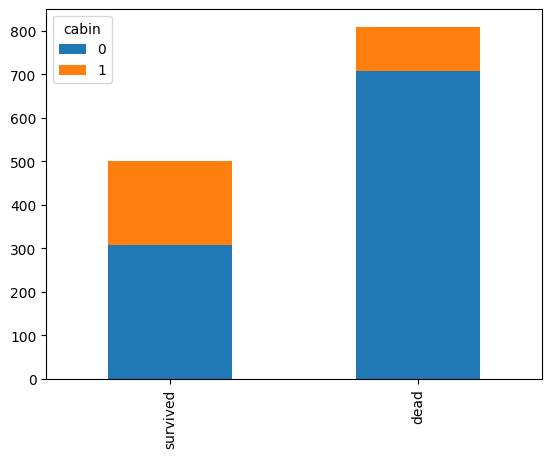

In [20]:
df['cabin'] = df['cabin'].fillna(0)
_mask = df.cabin != 0;
df.loc[_mask,'cabin'] = 1
df['cabin'] = df['cabin'].astype(int)

_survived = df[df["survived"]==1]["cabin"].value_counts()
_dead = df[df["survived"]==0]["cabin"].value_counts()
df_cabin = pd.DataFrame([_survived,_dead])
df_cabin.index = ["survived","dead"]
print(df_cabin)
df_cabin.plot.bar(stacked = True)

In [21]:
#do something with boat as there is no visible correlation with anything else.. set info for if have a boat or not. But concatenate it with the survivability

boat        1    0
survived  477   23
dead        9  800


<Axes: >

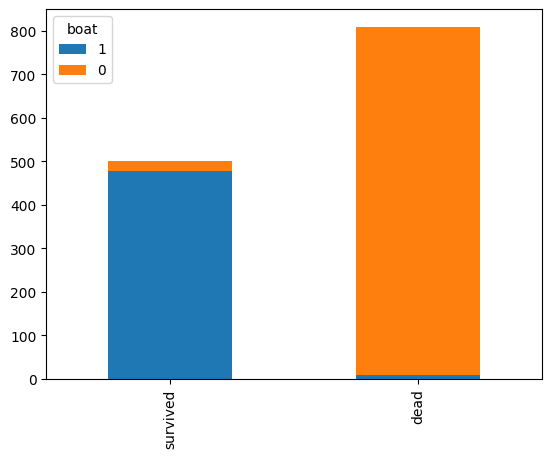

In [22]:
df['boat'] = df['boat'].fillna(0)
_mask = df.boat != 0;
df.loc[_mask,'boat'] = 1
df['boat'] = df['boat'].astype(int)

_survived = df[df["survived"]==1]["boat"].value_counts()
_dead = df[df["survived"]==0]["boat"].value_counts()
df_boat = pd.DataFrame([_survived,_dead])
df_boat.index = ["survived","dead"]
print(df_boat)
df_boat.plot.bar(stacked = True)

After cleanup!

In [23]:
#Maybe based on ticket get info

In [24]:
_ticket = df[df['embarked'].isna()]
_v = _ticket['ticket'].values[0];
display(_v)
#  full_cond = (clone['age'].isna()) & (clone['sex'] == _sex) & (clone[_class] == 1) & (clone['embarked'] == _embarked);

tickets = df[df['ticket'].between(_v-100,_v+100)]
display(tickets)
#fill it with C and S, does not matter i Think...

df['embarked'] = df['embarked'].fillna('S')

113572

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,class_0,class_1,class_2
36,1,"Bowerman, Miss. Elsie Edith",1,22.000000,0,1,113505,55.0000,1,S,1,"St Leonards-on-Sea, England Ohio",1.0,0.0,0.0
69,1,"Chibnall, Mrs. (Edith Martha Bowerman)",1,35.609375,0,1,113505,55.0000,1,S,1,"St Leonards-on-Sea, England Ohio",1.0,0.0,0.0
129,1,"Geiger, Miss. Amalie",1,35.000000,0,0,113503,211.5000,1,C,1,NaN,1.0,0.0,0.0
168,1,"Icard, Miss. Amelie",1,38.000000,0,0,113572,80.0000,1,NaN,1,NaN,1.0,0.0,0.0
173,0,"Keeping, Mr. Edwin",0,32.500000,0,0,113503,211.5000,1,C,0,NaN,1.0,0.0,0.0
189,0,"Long, Mr. Milton Clyde",0,29.000000,0,0,113501,30.0000,1,S,0,"Springfield, MA",1.0,0.0,0.0
220,1,"Ostby, Miss. Helene Ragnhild",1,22.000000,0,1,113509,61.9792,1,C,1,"Providence, RI",1.0,0.0,0.0
221,0,"Ostby, Mr. Engelhart Cornelius",0,65.000000,0,1,113509,61.9792,1,C,0,"Providence, RI",1.0,0.0,0.0
279,0,"Stead, Mr. William Thomas",0,62.000000,0,0,113514,26.5500,1,S,0,"Wimbledon Park, London / Hayling Island, Hants",1.0,0.0,0.0
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.000000,0,0,113572,80.0000,1,NaN,1,"Cincinatti, OH",1.0,0.0,0.0


In [25]:
#I will leave home dest.. remove it. Maybe there are some info but I do not have time...
df = df.drop(columns = ['home.dest'])

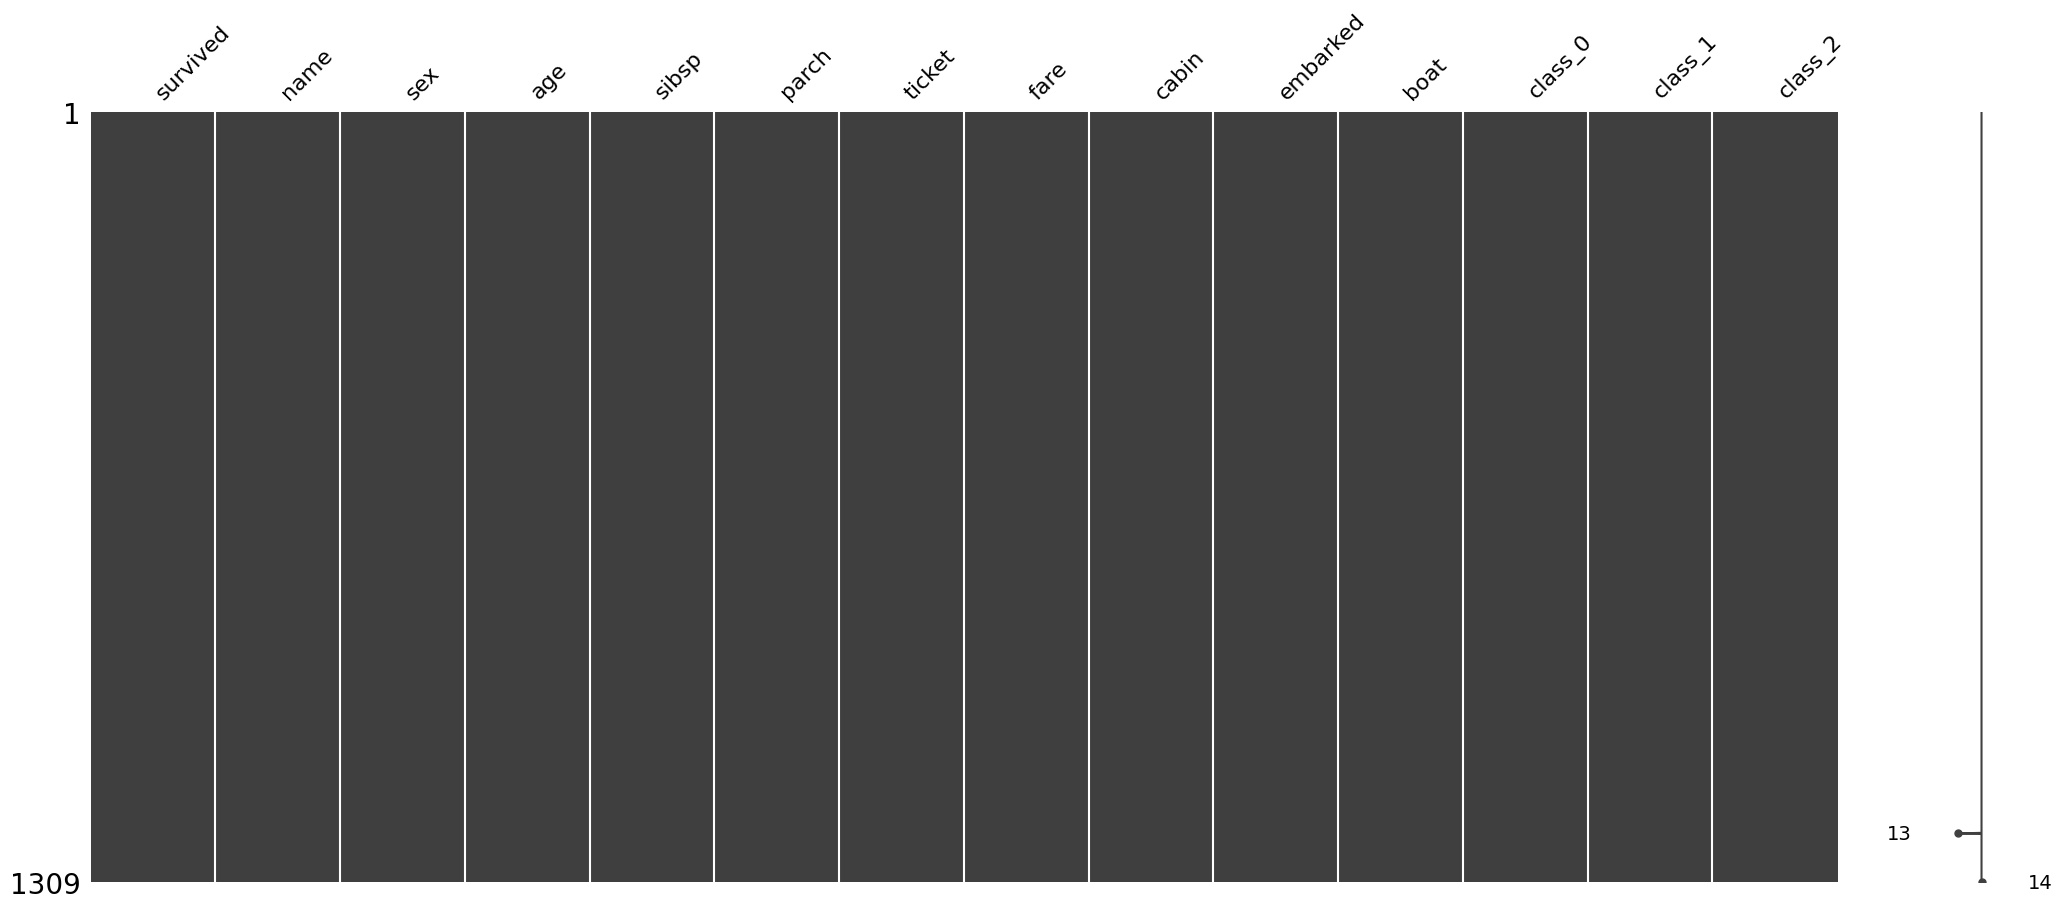

In [26]:
msno.matrix(df)
plt.show()

#so maybe add some info not about age itself but about the general binning? infant < 2, child < 10, and so one?

[13:47:31] WARNING  No artists with labels found to put in legend.  Note that artists whose label    ]8;id=756791;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=440468;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/legend.py#1363\1363]8;;\
                    start with an underscore are ignored when legend() is called with no argument.                 

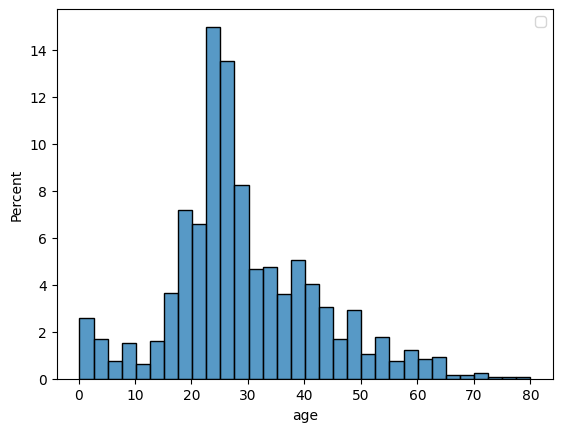

In [27]:
plot_hist_for_stat(df,'age', 'percent')


There are items with 0 fee, which is weird
how Fare can be 0? Only man. Multiple ages, and multiple Pclass
maybe they are workers? Or they are sponsors? No.. sponsors would get more family, I think


In [28]:
logger.debug(f"fare : {df['fare'].describe()}")

zero_fee = df[df['fare'] == 0]

def search_string(s, search):
    return search in str(s).lower()

for Name in zero_fee['name']:
    _name_list = list(Name.split(" "))
    length = len(_name_list)
    sure_name = _name_list[length-1].lower()
    mask = df.apply(lambda x: x.map(lambda s: search_string(s, sure_name)))
    filtered_df = df.loc[mask.any(axis=1)]
    logger.info(sure_name)
    logger.info(filtered_df['name'])
    logger.info("^"*10)
    

           DEBUG    fare : count    1308.000000                                                     ]8;id=529541;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=394794;file:///tmp/ipykernel_6919/1915494029.py#1\1]8;;\
                    mean       33.295479                                                                           
                    std        51.758668                                                                           
                    min         0.000000                                                                           
                    25%         7.895800                                                                           
                    50%        14.454200                                                                           
                    75%        31.275000                                                                           
                    max       512.329200                                                                           
                    Name: fare, dtype: float64                                                                     

           INFO     jr                                                                             ]8;id=982636;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=596878;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     7                                            Andrews, Mr. Thomas Jr            ]8;id=845199;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=415495;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    59      Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)                            
                    77                                 Compton, Mr. Alexander Taylor Jr                            
                    177                                    Kimball, Mr. Edwin Nelson Jr                            
                    178                Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)                            
                    233                   Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)                            
                    295                                     Thayer, Mr. John Borland Jr                            
                    298                                 Tucker, Mr. Gilbert Milligan Jr                            
                    385                                  Davies, Master. John Morgan Jr                            
                    453                                            Hood, Mr. Ambrose Jr                            
                    791                                            Elias, Mr. Joseph Jr                            
                    898                                 Johnson, Mr. William Cahoone Jr                            
                    1178                                       Sage, Mr. George John Jr                            
                    1234                                         Sutehall, Mr. Henry Jr                            
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=493194;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=325709;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     crispin                                                                        ]8;id=107858;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=782799;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     70    Chisholm, Mr. Roderick Robert Crispin                                    ]8;id=997255;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=73250;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=735043;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=817866;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     richard                                                                        ]8;id=306125;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=91293;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     20                         Beckwith, Mr. Richard Leonard                       ]8;id=374376;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=237464;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    21      Beckwith, Mrs. Richard Leonard (Sallie Monypeny)                                       
                    125                                     Fry, Mr. Richard                                       
                    269                           Smith, Mr. Richard William                                       
                    307                            White, Mr. Richard Frasar                                       
                    317                      Williams, Mr. Richard Norris II                                       
                    339                            Becker, Master. Richard F                                       
                    447                          Hocking, Mr. Richard George                                       
                    522                                   Otter, Mr. Richard                                       
                    527                         Parker, Mr. Clifford Richard                                       
                    542        Quick, Mrs. Frederick Charles (Jane Richards)                                       
                    547                                   Richard, Mr. Emile                                       
                    548                      Richards, Master. George Sibley                                       
                    549                       Richards, Master. William Rowe                                       
                    550                Richards, Mrs. Sidney (Emily Hocking)                                       
                    563                            Slemen, Mr. Richard James                                       
                    688                            Braund, Mr. Lewis Richard                                       
                    1065                        Nosworthy, Mr. Richard Cater                                       
                    1157                         Rosblom, Mr. Viktor Richard                                       
                    1160                            Rouse, Mr. Richard Henry                                       
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=125688;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=665501;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     william                                                                        ]8;id=637726;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=871775;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     43      Bucknell, Mrs. William Robert (Emma Eliza Ward)                        ]8;id=518650;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=274936;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    54                  Carter, Master. William Thornton II                                        
                    56                           Carter, Mr. William Ernest                                        
                    57            Carter, Mrs. William Ernest (Lucile Polk)                                        
                    60                        Cavendish, Mr. Tyrell William                                        
                                                 ...                                                               
                    1254                       Tornquist, Mr. William Henry                                        
                    1262                van Billiard, Master. James William                                        
                    1283                        Warren, Mr. Charles William                                        
                    1293                  Williams, Mr. Howard Hugh 'Harry'                                        
                    1294                               Williams, Mr. Leslie                                        
                    Name: name, Length: 93, dtype: object                                                          

           INFO     ^^^^^^^^^^                                                                     ]8;id=590247;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=320321;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     bruce                                                                          ]8;id=65534;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=94941;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     170    Ismay, Mr. Joseph Bruce                                                 ]8;id=349794;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=666567;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=122022;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=856452;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     marsh                                                                          ]8;id=420162;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=247498;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     223                                          Parr, Mr. William Henry Marsh     ]8;id=127040;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=542888;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    398                                          Drew, Master. Marshall Brines                     
                    509                         Morley, Mr. Henry Samuel ('Mr Henry Marshall')                     
                    534    Phillips, Miss. Kate Florence ('Mrs Kate Louise Phillips Marshall')                     
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=390539;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=807745;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     george                                                                         ]8;id=116615;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=747009;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     37          Bradley, Mr. George ('George Arthur Brayton')                      ]8;id=554620;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=471445;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    74                            Clifford, Mr. George Quincy                                      
                    135                             Goldschmidt, Mr. George B                                      
                    138                             Graham, Mr. George Edward                                      
                    143                           Harder, Mr. George Achilles                                      
                    144          Harder, Mrs. George Achilles (Dorothy Annan)                                      
                    193                     Madill, Miss. Georgette Alexandra                                      
                    234                       Reuchlin, Jonkheer. John George                                      
                    235                   Rheims, Mr. George Alexander Lucien                                      
                    243           Rosenshine, Mr. George ('Mr George Thorne')                                      
                    284             Stone, Mrs. George Nelson (Martha Evelyn)                                      
                    310                              Wick, Mr. George Dennick                                      
                    311            Wick, Mrs. George Dennick (Mary Hitchcock)                                      
                    312                            Widener, Mr. George Dunton                                      
                    314          Widener, Mrs. George Dunton (Eleanor Elkins)                                      
                    321                                    Wright, Mr. George                                      
                    403                          Eitemiller, Mr. George Floyd                                      
                    432                                    Harris, Mr. George                                      
                    444                           Hickman, Mr. Stanley George                                      
                    447                           Hocking, Mr. Richard George                                      
                    457                                Hunt, Mr. George Henry                                      
                    548                       Richards, Master. George Sibley                                      
                    568                                     Swane, Mr. George                                      
                    569                           Sweet, Mr. George Frederick                                      
                    619                                Allum, Mr. Owen George                                      
                    765              Dean, Mrs. Bertram (Eva Georgetta Light)                                      
                    833                               Green, Mr. George Henry                                      
                    983                            MacKay, Mr. George William                                      
                    1035    Moubarek, Master. Halim Gonios ('William George')                                      
                    1036     Moubarek, Mrs. George (Omine 'Amenia' Alexander)                                      
                    1108                                 Patchett, Mr. George                                      
                    1138                               Reed, Mr. James George                                      
                    1145                            Rice, Master. George Hugh                                      
                    1161                   

           INFO     ^^^^^^^^^^                                                                     ]8;id=594558;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=855875;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     william                                                                        ]8;id=675394;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=804350;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     43      Bucknell, Mrs. William Robert (Emma Eliza Ward)                        ]8;id=370449;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=335230;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    54                  Carter, Master. William Thornton II                                        
                    56                           Carter, Mr. William Ernest                                        
                    57            Carter, Mrs. William Ernest (Lucile Polk)                                        
                    60                        Cavendish, Mr. Tyrell William                                        
                                                 ...                                                               
                    1254                       Tornquist, Mr. William Henry                                        
                    1262                van Billiard, Master. James William                                        
                    1283                        Warren, Mr. Charles William                                        
                    1293                  Williams, Mr. Howard Hugh 'Harry'                                        
                    1294                               Williams, Mr. Leslie                                        
                    Name: name, Length: 93, dtype: object                                                          

           INFO     ^^^^^^^^^^                                                                     ]8;id=781386;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=720121;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     fleming                                                                        ]8;id=863551;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=274248;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     108           Fleming, Miss. Margaret                                          ]8;id=135102;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=231432;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    384    Cunningham, Mr. Alfred Fleming                                                          
                    800             Fleming, Miss. Honora                                                          
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=803239;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=279402;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     'archie'                                                                       ]8;id=608034;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=959260;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     410    Frost, Mr. Anthony Wood 'Archie'                                        ]8;id=911552;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=456306;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=383038;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=203796;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     j                                                                              ]8;id=830490;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=749122;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     3                    Allison, Mr. Hudson Joshua Creighton                      ]8;id=715174;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=439366;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)                                      
                    7                                  Andrews, Mr. Thomas Jr                                      
                    10                                 Astor, Col. John Jacob                                      
                    11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)                                      
                                                  ...                                                              
                    1284                                    Webber, Mr. James                                      
                    1286      Whabee, Mrs. George Joseph (Shawneene Abi-Saab)                                      
                    1288                            Wiklund, Mr. Jakob Alfred                                      
                    1289                              Wiklund, Mr. Karl Johan                                      
                    1290                     Wilkes, Mrs. James (Ellen Needs)                                      
                    Name: name, Length: 332, dtype: object                                                         

           INFO     ^^^^^^^^^^                                                                     ]8;id=501663;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=313547;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     'frank'                                                                        ]8;id=772263;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=109764;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     528    Parkes, Mr. Francis 'Frank'                                             ]8;id=866277;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=662464;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=940794;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=508327;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     hastings                                                                       ]8;id=54726;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=980928;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     581    Watson, Mr. Ennis Hastings                                              ]8;id=278116;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=800148;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=416710;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=45575;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     alfred                                                                         ]8;id=139888;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=446818;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     107                        Flegenheim, Mrs. Alfred (Antoinette)                ]8;id=889755;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=560291;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    219                                   Omont, Mr. Alfred Fernand                                
                    248                                          Rowe, Mr. Alfred G                                
                    384                              Cunningham, Mr. Alfred Fleming                                
                    416                                         Gaskell, Mr. Alfred                                
                    520                Nourney, Mr. Alfred ('Baron von Drachstedt')                                
                    525                                            Pain, Dr. Alfred                                
                    655                                  Backstrom, Mr. Karl Alfred                                
                    656     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)                                
                    691                             Brocklebank, Mr. William Alfred                                
                    711                                     Carver, Mr. Alfred John                                
                    752                                        Davies, Mr. Alfred J                                
                    836                               Gustafsson, Mr. Alfred Ossian                                
                    888                                  Johanson, Mr. Jakob Alfred                                
                    896                                         Johnson, Mr. Alfred                                
                    1111                             Peacock, Master. Alfred Edward                                
                    1161                               Rush, Mr. Alfred George John                                
                    1288                                  Wiklund, Mr. Jakob Alfred                                
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=37976;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=662594;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     jr                                                                             ]8;id=269512;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=312249;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     7                                            Andrews, Mr. Thomas Jr            ]8;id=170262;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=350005;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    59      Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)                            
                    77                                 Compton, Mr. Alexander Taylor Jr                            
                    177                                    Kimball, Mr. Edwin Nelson Jr                            
                    178                Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)                            
                    233                   Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)                            
                    295                                     Thayer, Mr. John Borland Jr                            
                    298                                 Tucker, Mr. Gilbert Milligan Jr                            
                    385                                  Davies, Master. John Morgan Jr                            
                    453                                            Hood, Mr. Ambrose Jr                            
                    791                                            Elias, Mr. Joseph Jr                            
                    898                                 Johnson, Mr. William Cahoone Jr                            
                    1178                                       Sage, Mr. George John Jr                            
                    1234                                         Sutehall, Mr. Henry Jr                            
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=522631;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=448249;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     lionel                                                                         ]8;id=758696;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=71914;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     963    Leonard, Mr. Lionel                                                     ]8;id=725339;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=734999;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    Name: name, dtype: object                                                                      

           INFO     ^^^^^^^^^^                                                                     ]8;id=65536;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=386605;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

           INFO     henry                                                                          ]8;id=169856;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=124964;file:///tmp/ipykernel_6919/1915494029.py#14\14]8;;\

           INFO     14                             Barkworth, Mr. Algernon Henry Wilson            ]8;id=693175;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=278881;file:///tmp/ipykernel_6919/1915494029.py#15\15]8;;\
                    31                                                 Blank, Mr. Henry                            
                    59      Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)                            
                    119                                   Frauenthal, Dr. Henry William                            
                    121              Frauenthal, Mrs. Henry William (Clara Heinsheimer)                            
                    145                                       Harper, Mr. Henry Sleeper                            
                    146                        Harper, Mrs. Henry Sleeper (Myna Haxtun)                            
                    148                                     Harris, Mr. Henry Birkhardt                            
                    149                    Harris, Mrs. Henry Birkhardt (Irene Wallach)                            
                    157                                     Hilliard, Mr. Herbert Henry                            
                    172                                        Julian, Mr. Henry Forbes                            
                    223                                   Parr, Mr. William Henry Marsh                            
                    280                                 Stengel, Mr. Charles Emil Henry                            
                    281             Stengel, Mrs. Charles Emil Henry (Annie May Morris)                            
                    338                                      Beauchamp, Mr. Henry James                            
                    367                                      Chapman, Mr. Charles Henry                            
                    368                                         Chapman, Mr. John Henry                            
                    369                 Chapman, Mrs. John Henry (Sara Elizabeth Lawry)                            
                    383                                    Cotterill, Mr. Henry 'Harry'                            
                    386                                       Davies, Mr. Charles Henry                            
                    423                                    Gillespie, Mr. William Henry                            
                    450                                         Hodges, Mr. Henry Price                            
                    457                                          Hunt, Mr. George Henry                            
                    506                                     Mitchell, Mr. Henry Michael                            
                    509                  Morley, Mr. Henry Samuel ('Mr Henry Marshall')                            
                    544                                         Renouf, Mr. Peter Henry                            
                    545                     Renouf, Mrs. Peter Henry (Lillian Jefferys)                            
                    589               Wells, Mrs. Arthur Henry ('Addie' Dart Trevaskis)                            
                    618                                        Allen, Mr. William Henry                            
                    723                                        Conlon, Mr. Thomas Henry                            
                    756                                       Davison, Mr. Thomas Henry                            
                    757                       Davison, Mrs. Thomas Henry (Mary E Finck)                            
                    833                                         Green, Mr. George Henry                            
                    850                    

           INFO     ^^^^^^^^^^                                                                     ]8;id=812247;file:///tmp/ipykernel_6919/1915494029.py\1915494029.py]8;;\:]8;id=714345;file:///tmp/ipykernel_6919/1915494029.py#16\16]8;;\

## 0 fee

In [29]:
_indexes  = zero_fee.index.to_numpy();
_len_0 = len(_indexes)
logger.info(f'Percent of people with 0 Fee is = {(_len_0 * 100) / df.shape[0]} %')
df = df.drop(index=_indexes)

           INFO     Percent of people with 0 Fee is = 1.2987012987012987 %                           ]8;id=307075;file:///tmp/ipykernel_6919/834334822.py\834334822.py]8;;\:]8;id=140915;file:///tmp/ipykernel_6919/834334822.py#3\3]8;;\

In [30]:
logger.info(df.sort_values('fare', ascending = False).head(80)[['fare','class_0','class_1','class_2']])
logger.info(df.sort_values('fare').head(80)[['fare','class_0','class_1','class_2']])


           INFO              fare  class_0  class_1  class_2                                         ]8;id=723564;file:///tmp/ipykernel_6919/636529649.py\636529649.py]8;;\:]8;id=674905;file:///tmp/ipykernel_6919/636529649.py#1\1]8;;\
                    50   512.3292      1.0      0.0      0.0                                                       
                    49   512.3292      1.0      0.0      0.0                                                       
                    302  512.3292      1.0      0.0      0.0                                                       
                    183  512.3292      1.0      0.0      0.0                                                       
                    112  263.0000      1.0      0.0      0.0                                                       
                    ..        ...      ...      ...      ...                                                       
                    296  110.8833      1.0      0.0      0.0                                                       
                    295  110.8833      1.0      0.0      0.0                                                       
                    108  110.8833      1.0      0.0      0.0                                                       
                    218  108.9000      1.0      0.0      0.0                                                       
                    229  108.9000      1.0      0.0      0.0                                                       
                                                                                                                   
                    [80 rows x 4 columns]                                                                          

           INFO             fare  class_0  class_1  class_2                                          ]8;id=494813;file:///tmp/ipykernel_6919/636529649.py\636529649.py]8;;\:]8;id=280739;file:///tmp/ipykernel_6919/636529649.py#2\2]8;;\
                    1082  3.1708      0.0      0.0      1.0                                                        
                    673   4.0125      0.0      0.0      1.0                                                        
                    51    5.0000      1.0      0.0      0.0                                                        
                    1068  6.2375      0.0      0.0      1.0                                                        
                    1242  6.4375      0.0      0.0      1.0                                                        
                    ...      ...      ...      ...      ...                                                        
                    653   7.2292      0.0      0.0      1.0                                                        
                    1037  7.2292      0.0      0.0      1.0                                                        
                    1255  7.2292      0.0      0.0      1.0                                                        
                    1164  7.2292      0.0      0.0      1.0                                                        
                    1053  7.2292      0.0      0.0      1.0                                                        
                                                                                                                   
                    [80 rows x 4 columns]                                                                          

In [31]:
numerical_data = get_data_type(df,PDataType.NUMERICAL)
'''
numerical_data = df.drop(columns = ['name', 'ticket'])
plot_overall_correlation_for(numerical_data,'survived',5)
plot_correlation_for(numerical_data, 'survived',10)
'''
logger.info(numerical_data)

           INFO           survived  sex        age  sibsp  parch  ticket      fare  cabin  boat  \  ]8;id=676581;file:///tmp/ipykernel_6919/1738818151.py\1738818151.py]8;;\:]8;id=467296;file:///tmp/ipykernel_6919/1738818151.py#7\7]8;;\
                    0            1    1  29.000000      0      0   24160  211.3375      1     1                    
                    1            1    0   0.916700      1      2  113781  151.5500      1     1                    
                    2            0    1   2.000000      1      2  113781  151.5500      1     0                    
                    3            0    0  30.000000      1      2  113781  151.5500      1     0                    
                    4            0    1  25.000000      1      2  113781  151.5500      1     0                    
                    ...        ...  ...        ...    ...    ...     ...       ...    ...   ...                    
                    1304         0    1  14.500000      1      0    2665   14.4542      0     0                    
                    1305         0    1  16.818182      1      0    2665   14.4542      0     0                    
                    1306         0    0  26.500000      0      0    2656    7.2250      0     0                    
                    1307         0    0  27.000000      0      0    2670    7.2250      0     0                    
                    1308         0    0  29.000000      0      0  315082    7.8750      0     0                    
                                                                                                                   
                          class_0  class_1  class_2                                                                
                    0         1.0      0.0      0.0                                                                
                    1         1.0      0.0      0.0                                                                
                    2         1.0      0.0      0.0                                                                
                    3         1.0      0.0      0.0                                                                
                    4         1.0      0.0      0.0                                                                
                    ...       ...      ...      ...                                                                
                    1304      0.0      0.0      1.0                                                                
                    1305      0.0      0.0      1.0                                                                
                    1306      0.0      0.0      1.0                                                                
                    1307      0.0      0.0      1.0                                                                
                    1308      0.0      0.0      1.0                                                                
                                                                                                                   
                    [1292 rows x 12 columns]                                                                       

## Fare and PClass have high correlation. So... look it up?

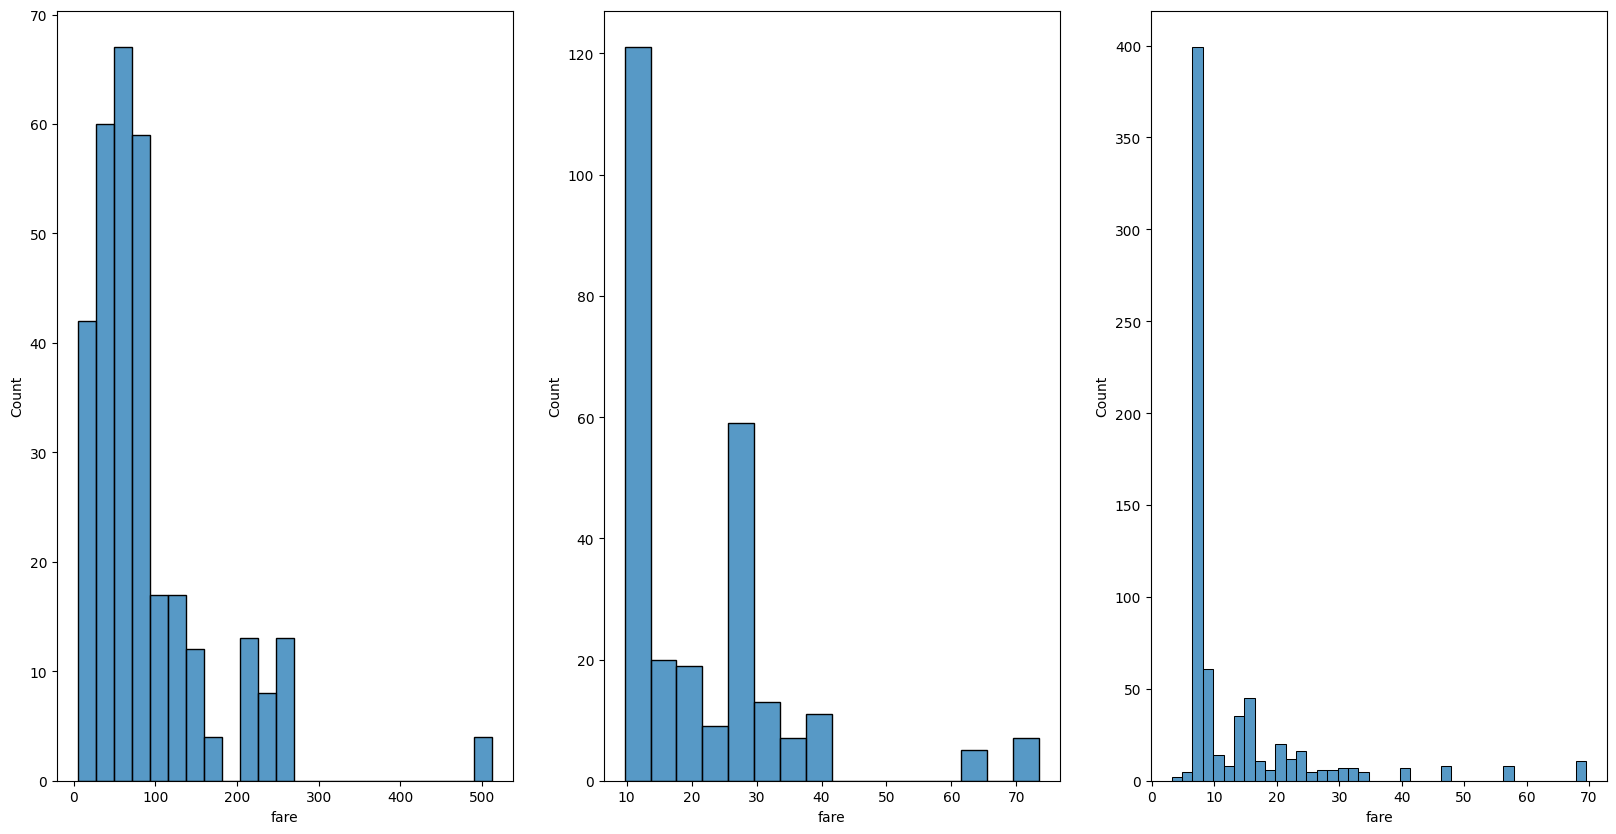

In [32]:
fig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))
for i,Pclass in enumerate(Pclasses):
    sns.histplot(numerical_data[numerical_data[Pclass] == 1]['fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')
plt.show()


[13:47:32] DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f15ad1bd930>               ]8;id=194657;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:]8;id=189850;file:///home/mg/AI_Py_3_10/lib/python3.10/site-packages/matplotlib/colorbar.py#859\859]8;;\

/home/mg/AI_Py_3_10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


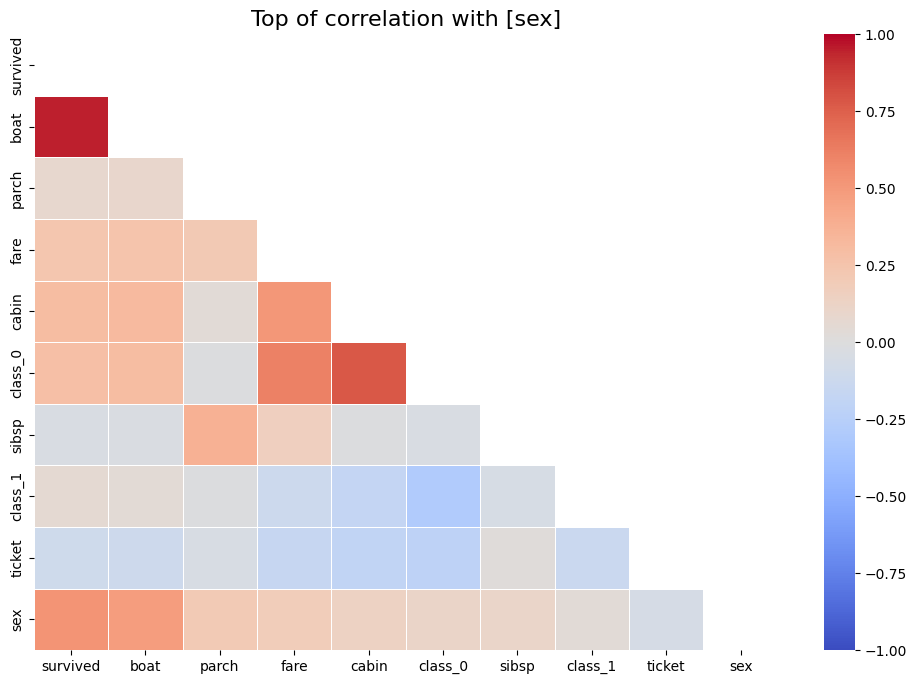

survived    0.527826
boat        0.480961
parch       0.209809
fare        0.180368
cabin       0.139066
class_0     0.112588
sibsp       0.105465
class_1     0.032683
ticket     -0.057913
Name: sex, dtype: float64

In [33]:
plot_correlation_for(numerical_data, 'sex',10)

In [34]:
#Correlation between sex and survival. In Percent
women = numerical_data.loc[numerical_data.sex == 1]["survived"]
rate_women = (sum(women)/len(women) ) * 100
#logger.info(f"woman count : {numerical_data.loc[numerical_data.Sex == 1].value_counts():,.2f} %")
allSexes = numerical_data['sex'].value_counts();
logger.info(f"Man on Titanic {allSexes[0]}")
logger.info(f"Woman on Titanic {allSexes[1]}")
logger.info(f"Woman/Man ratio on Titanic {allSexes[1]/allSexes[0]}")

logger.info(f"Survival rate woman : {rate_women:,.2f} %")

man = numerical_data.loc[numerical_data.sex == 0]["survived"]
rate_men = (sum(man)/len(man))*100
logger.info(f"Survival rate man : {rate_men:,.2f} %")


           INFO     Man on Titanic 826                                                              ]8;id=150870;file:///tmp/ipykernel_6919/4243539376.py\4243539376.py]8;;\:]8;id=255700;file:///tmp/ipykernel_6919/4243539376.py#6\6]8;;\

           INFO     Woman on Titanic 466                                                            ]8;id=921848;file:///tmp/ipykernel_6919/4243539376.py\4243539376.py]8;;\:]8;id=499198;file:///tmp/ipykernel_6919/4243539376.py#7\7]8;;\

           INFO     Woman/Man ratio on Titanic 0.5641646489104116                                   ]8;id=286067;file:///tmp/ipykernel_6919/4243539376.py\4243539376.py]8;;\:]8;id=306431;file:///tmp/ipykernel_6919/4243539376.py#8\8]8;;\

           INFO     Survival rate woman : 72.75 %                                                  ]8;id=692547;file:///tmp/ipykernel_6919/4243539376.py\4243539376.py]8;;\:]8;id=844081;file:///tmp/ipykernel_6919/4243539376.py#10\10]8;;\

           INFO     Survival rate man : 19.25 %                                                    ]8;id=878061;file:///tmp/ipykernel_6919/4243539376.py\4243539376.py]8;;\:]8;id=79682;file:///tmp/ipykernel_6919/4243539376.py#14\14]8;;\

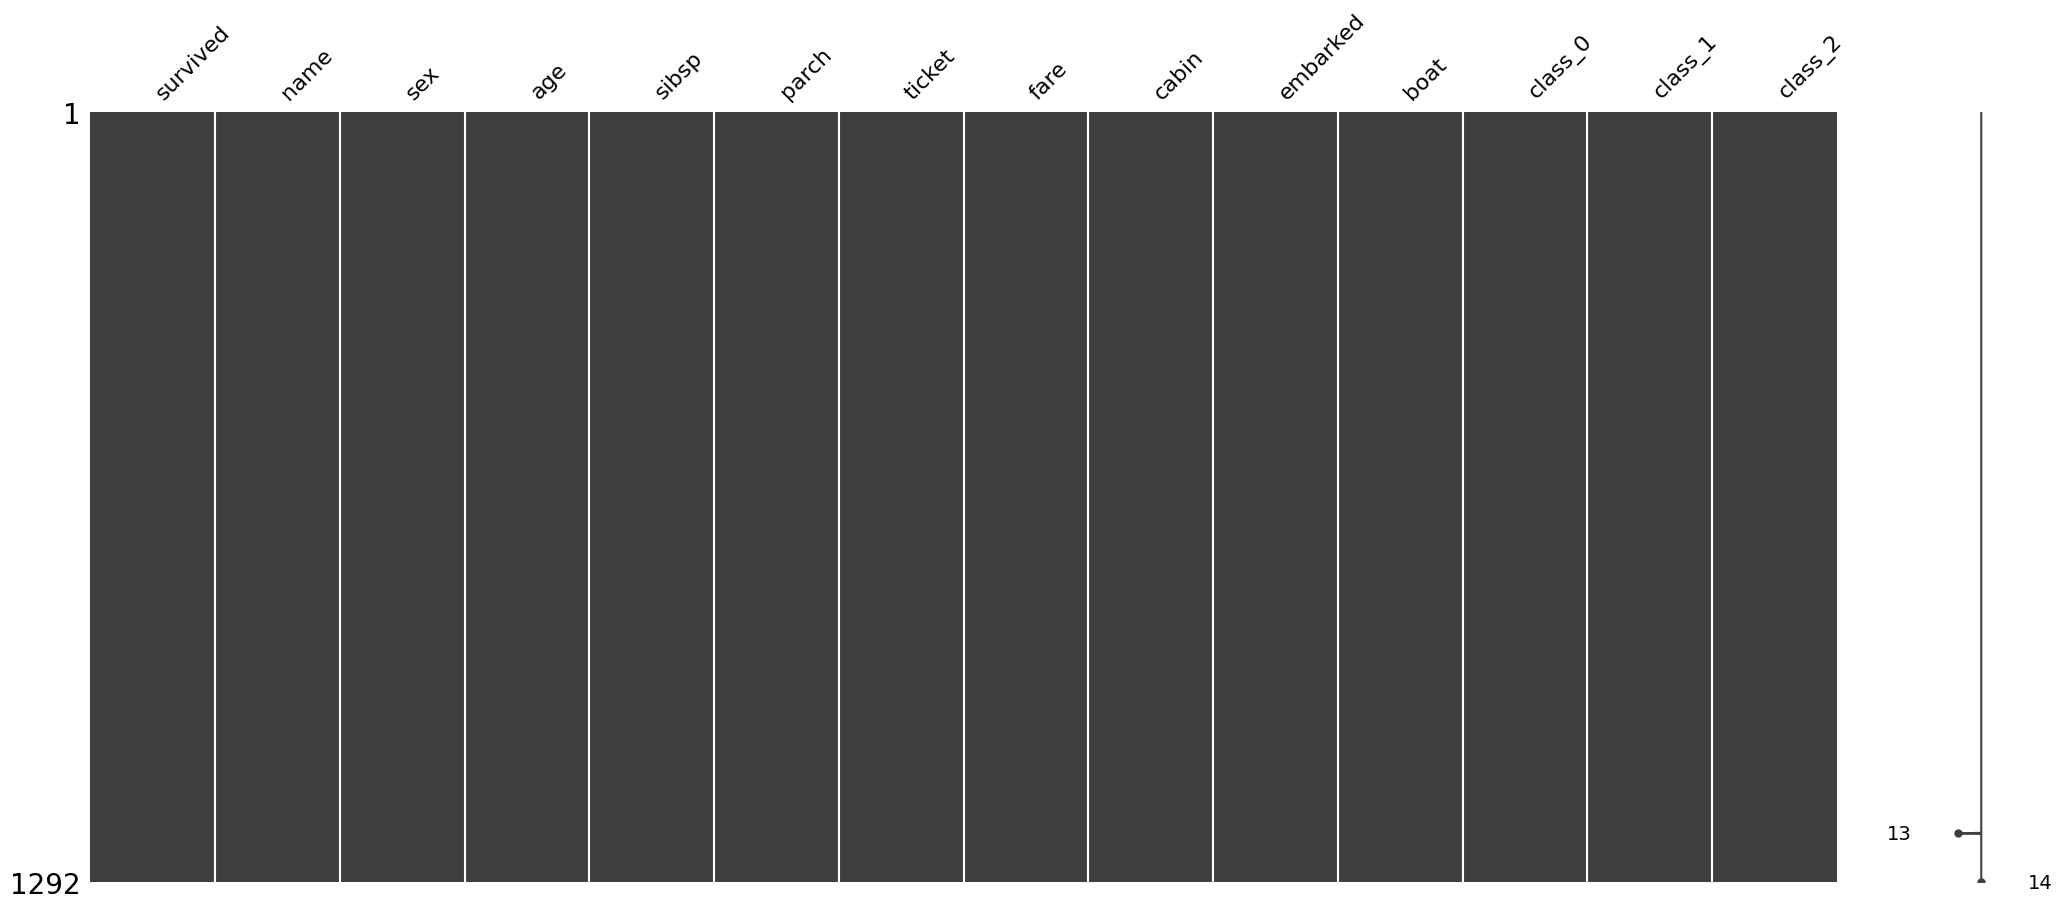

In [35]:
msno.matrix(df)
plt.show()

In [36]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['embarked']]).toarray()).add_prefix('embarked_')
enc_df.info()
#df = df.join(enc_df)
#df = df.drop(columns = ['embarked'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   embarked_0  1292 non-null   float64
 1   embarked_1  1292 non-null   float64
 2   embarked_2  1292 non-null   float64
dtypes: float64(3)
memory usage: 30.4 KB


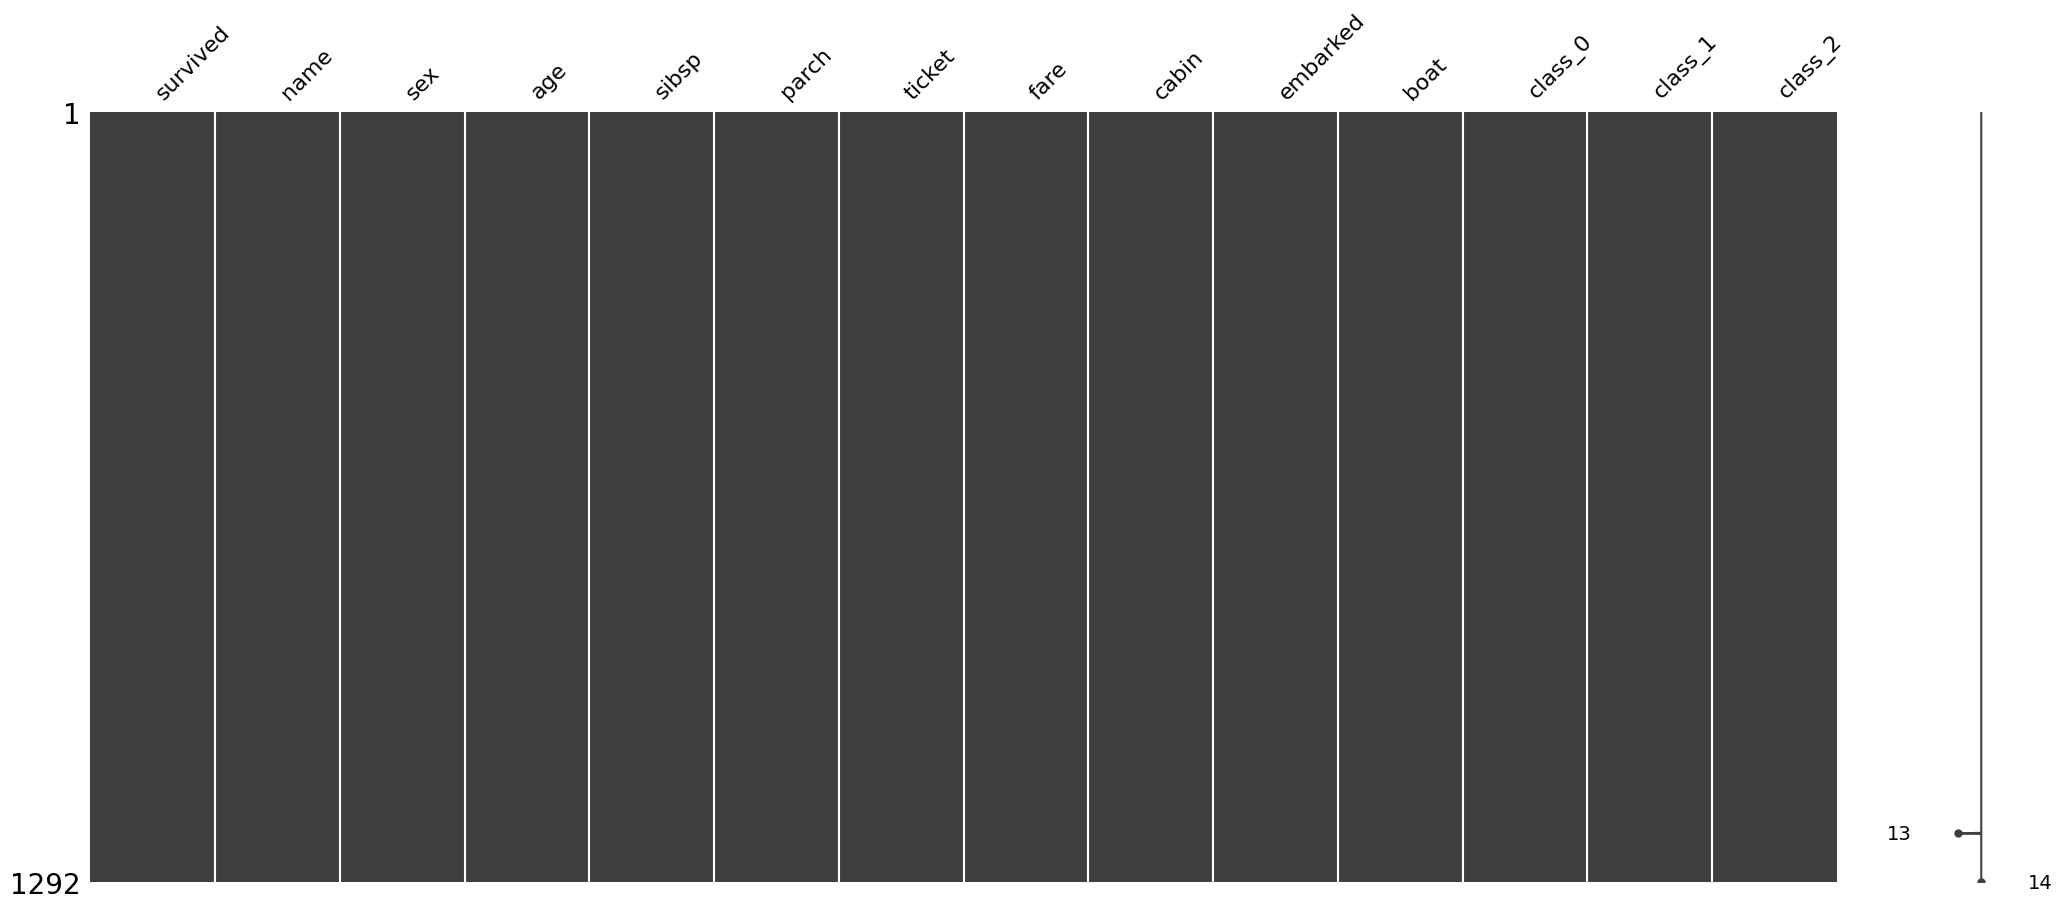

In [37]:
msno.matrix(df)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [43]:
df.to_csv('../db/titanic_FR.csv', index=False) 

# Some random predictions

In [40]:
df

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,class_0,class_1,class_2
0,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,1,S,1,1.0,0.0,0.0
1,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,151.5500,1,S,1,1.0,0.0,0.0
2,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,1,S,0,1.0,0.0,0.0
3,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,1,S,0,1.0,0.0,0.0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,1,S,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,0,C,0,0.0,0.0,1.0
1305,0,"Zabour, Miss. Thamine",1,16.818182,1,0,2665,14.4542,0,C,0,0.0,0.0,1.0
1306,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,0,C,0,0.0,0.0,1.0
1307,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,0,C,0,0.0,0.0,1.0


In [41]:
X = df.drop(columns = ['survived','name'])
Y = df['survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

ValueError: could not convert string to float: 'S'